In [4]:
%run setup.ipynb 

## Analysis of Scores by Division, 2002-2024

### Summary Statistics for Scores

In [5]:
# group the median scores by division and overall score 
score_groups = championship_df.groupby(['Division'])['OverallScore']

# count the number of scores in each division
score_group_count = championship_df.groupby(['Division'])['OverallScore'].count()

# create a dataframe of summary statistics for all divisions over all years
score_summary = pd.DataFrame({"Number of Scores": score_group_count,
                             "Mean Score": score_groups.mean(),
                              "Median Score": score_groups.median(),
                              "Standard Deviation": score_groups.std(),
                              "Variance": score_groups.var()}) 

# show dataframe
score_summary

# print to markdown
#print(score_summary.to_markdown())

,Number of Scores,Mean Score,Median Score,Standard Deviation,Variance
Division,,,,,
DHGP,131,64.276924,65.0000,6.420817,41.226885
DHPSG,255,66.508380,67.3060,5.569453,31.018807
FEI5,305,7.531452,7.5800,0.855057,0.731123
FEI6,291,7.398419,7.5160,0.992308,0.984675
FEI7,40,70.175000,70.7785,7.703862,59.349487
USEF4,281,7.606413,7.6200,0.791772,0.626902


### USEF 4 Year Old Analysis

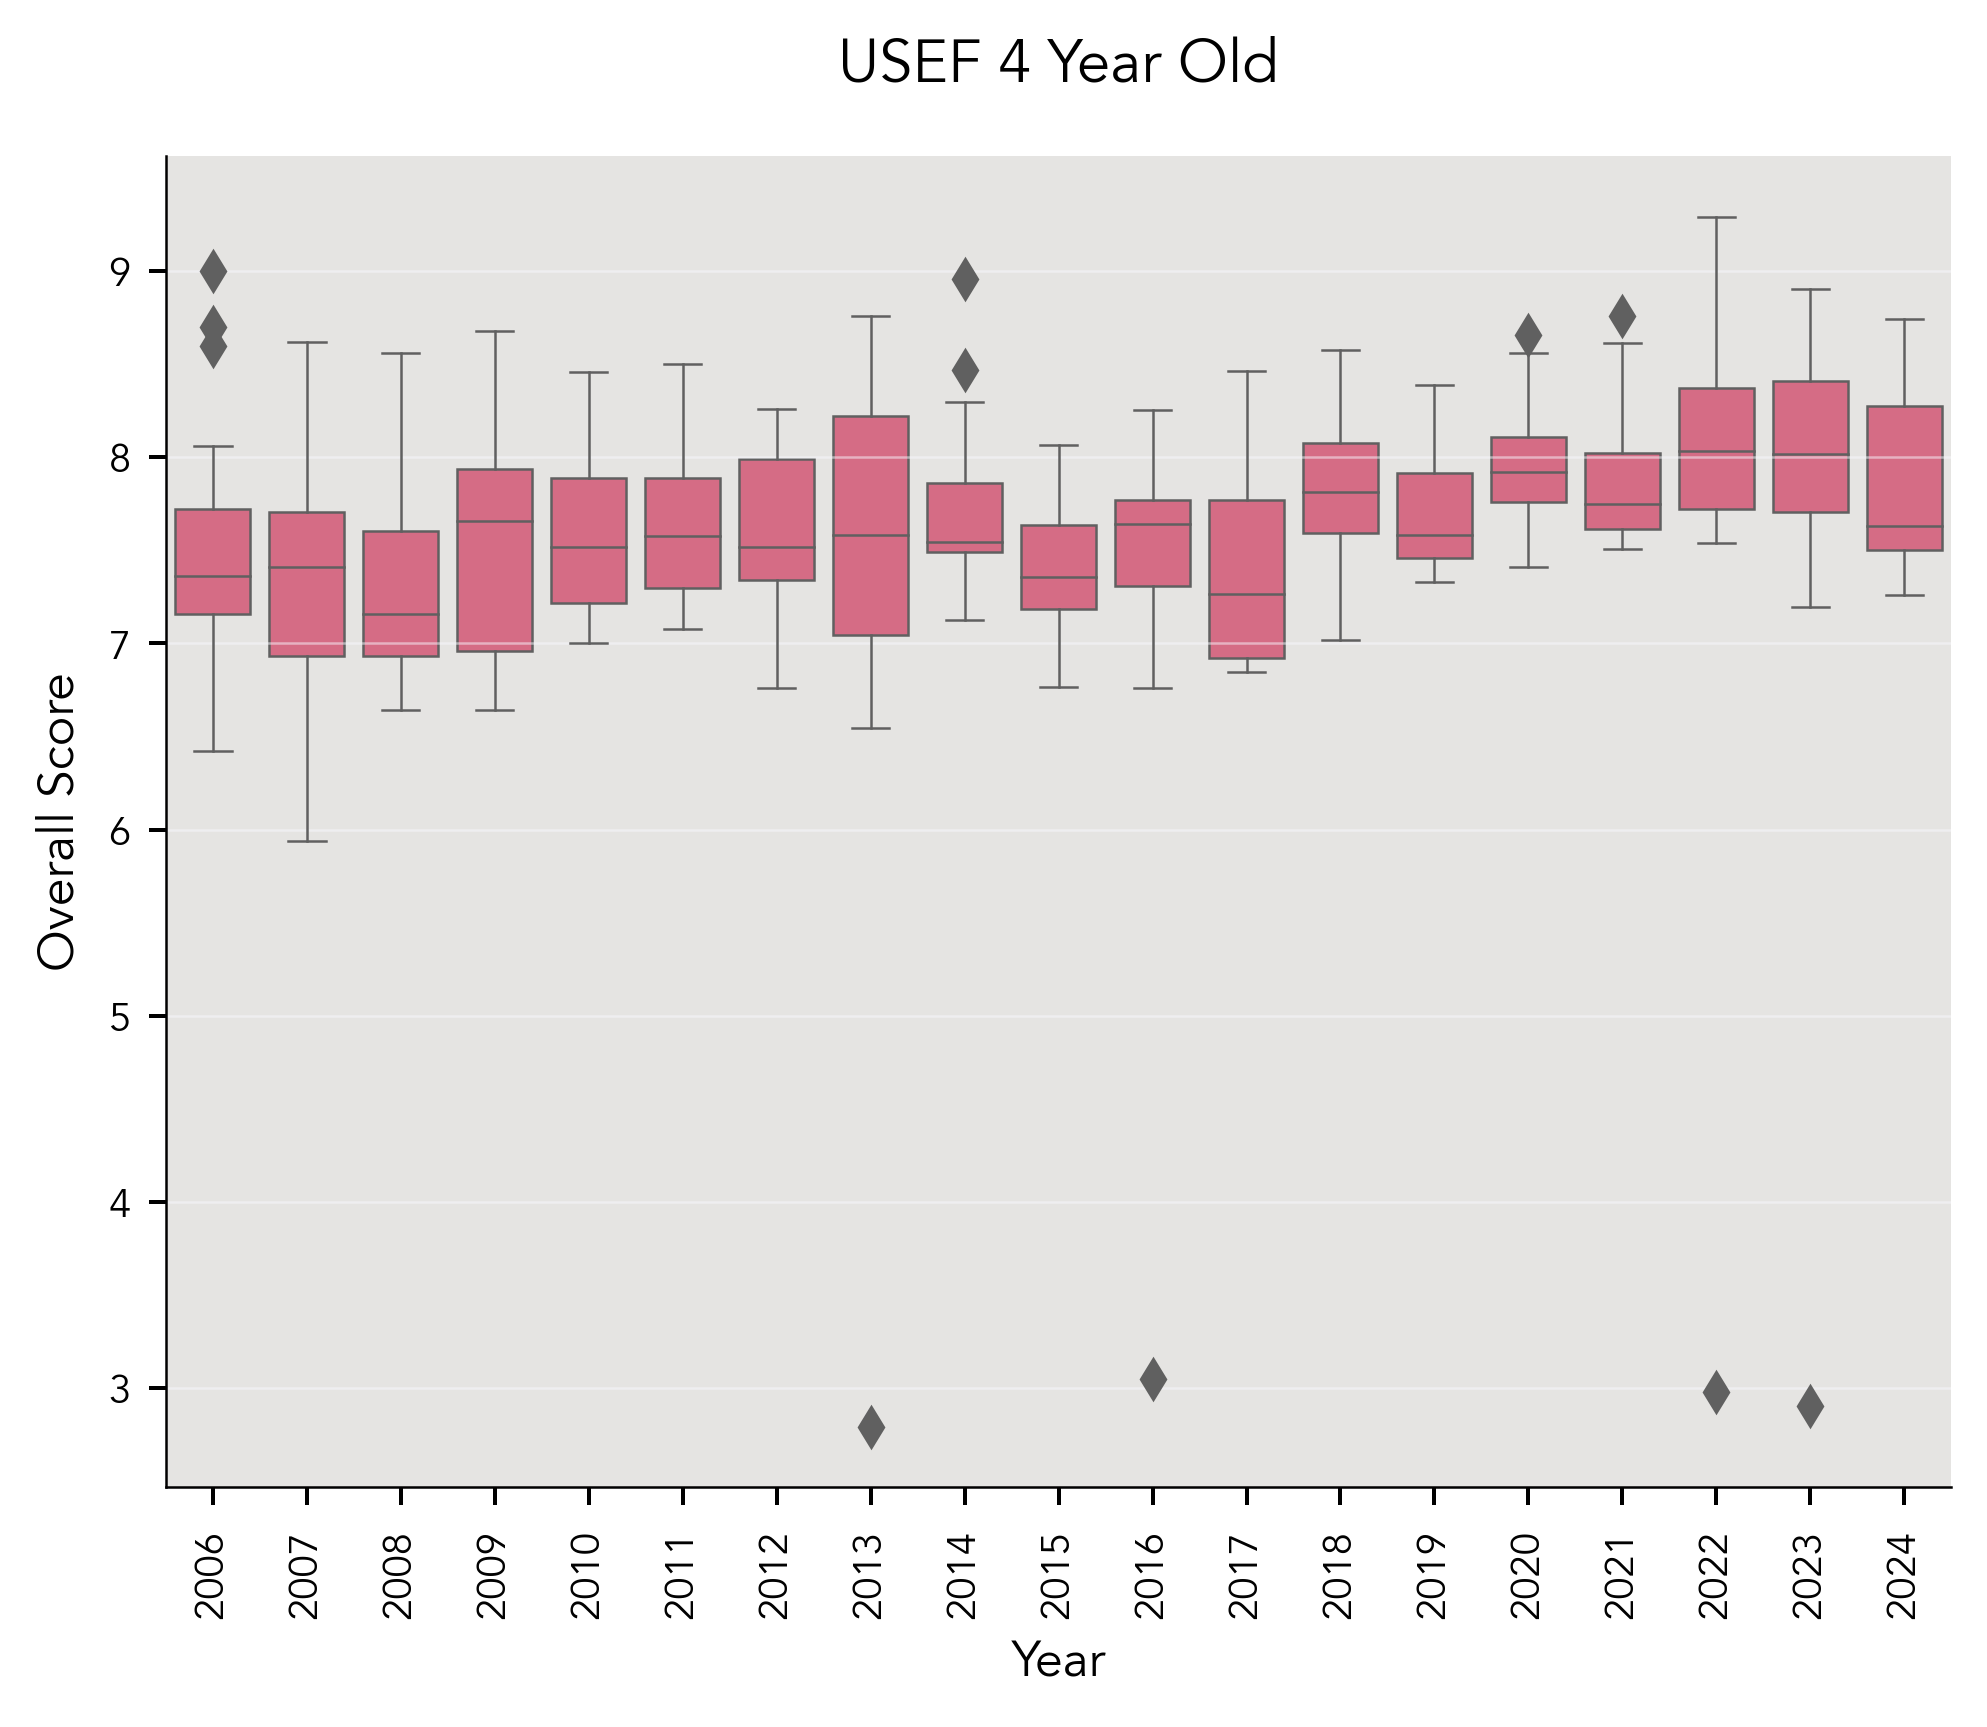

9.129999999999999 6.170000000000002
|      |   Year | Division   | Horse          |   OverallPlacing |   USDFNumber |   OverallScore |
|-----:|-------:|:-----------|:---------------|-----------------:|-------------:|---------------:|
|  176 |   2007 | USEF4      | Rebecca        |               20 |      1063158 |          5.94  |
|  525 |   2013 | USEF4      | Floretienne    |               14 |      1101450 |          2.792 |
|  717 |   2016 | USEF4      | Jagger         |               14 |      1111241 |          3.048 |
| 1128 |   2022 | USEF4      | Furst Dream    |                1 |      1150621 |          9.292 |
| 1140 |   2022 | USEF4      | Fantastic M.R. |               13 |      1150825 |          2.976 |
| 1223 |   2023 | USEF4      | Maisie CF      |               16 |      1149166 |          2.904 |


In [6]:
# select USEF 4 Year Old scores
four_year_old_scores = championship_df.loc[(championship_df['Division'].str.contains('USEF4'))]

# calculate IQR for column OverallScore
Q1 = four_year_old_scores['OverallScore'].quantile(0.25)
Q3 = four_year_old_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
ax = sns.boxplot(data=four_year_old_scores, x='Year', y='OverallScore', color='#e75a7c')

# set title and ylabel
plt.title('USEF 4 Year Old')
plt.ylabel('Overall Score')

# rotate xticks
plt.xticks(rotation=90)

# save and show figure
plt.savefig('images/usef4-boxplot.png')
plt.show()

# identify outliers
threshold = 1.5
lower = (Q1 - threshold * IQR)
upper = (Q3 + threshold * IQR)
print(upper, lower)
outliers = four_year_old_scores[(four_year_old_scores['OverallScore'] < Q1 - threshold * IQR) | (four_year_old_scores['OverallScore'] > Q3 + threshold * IQR)]
print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
four_year_old_scores = four_year_old_scores.drop(four_year_old_scores[four_year_old_scores['OverallScore'] <= 5.8].index)

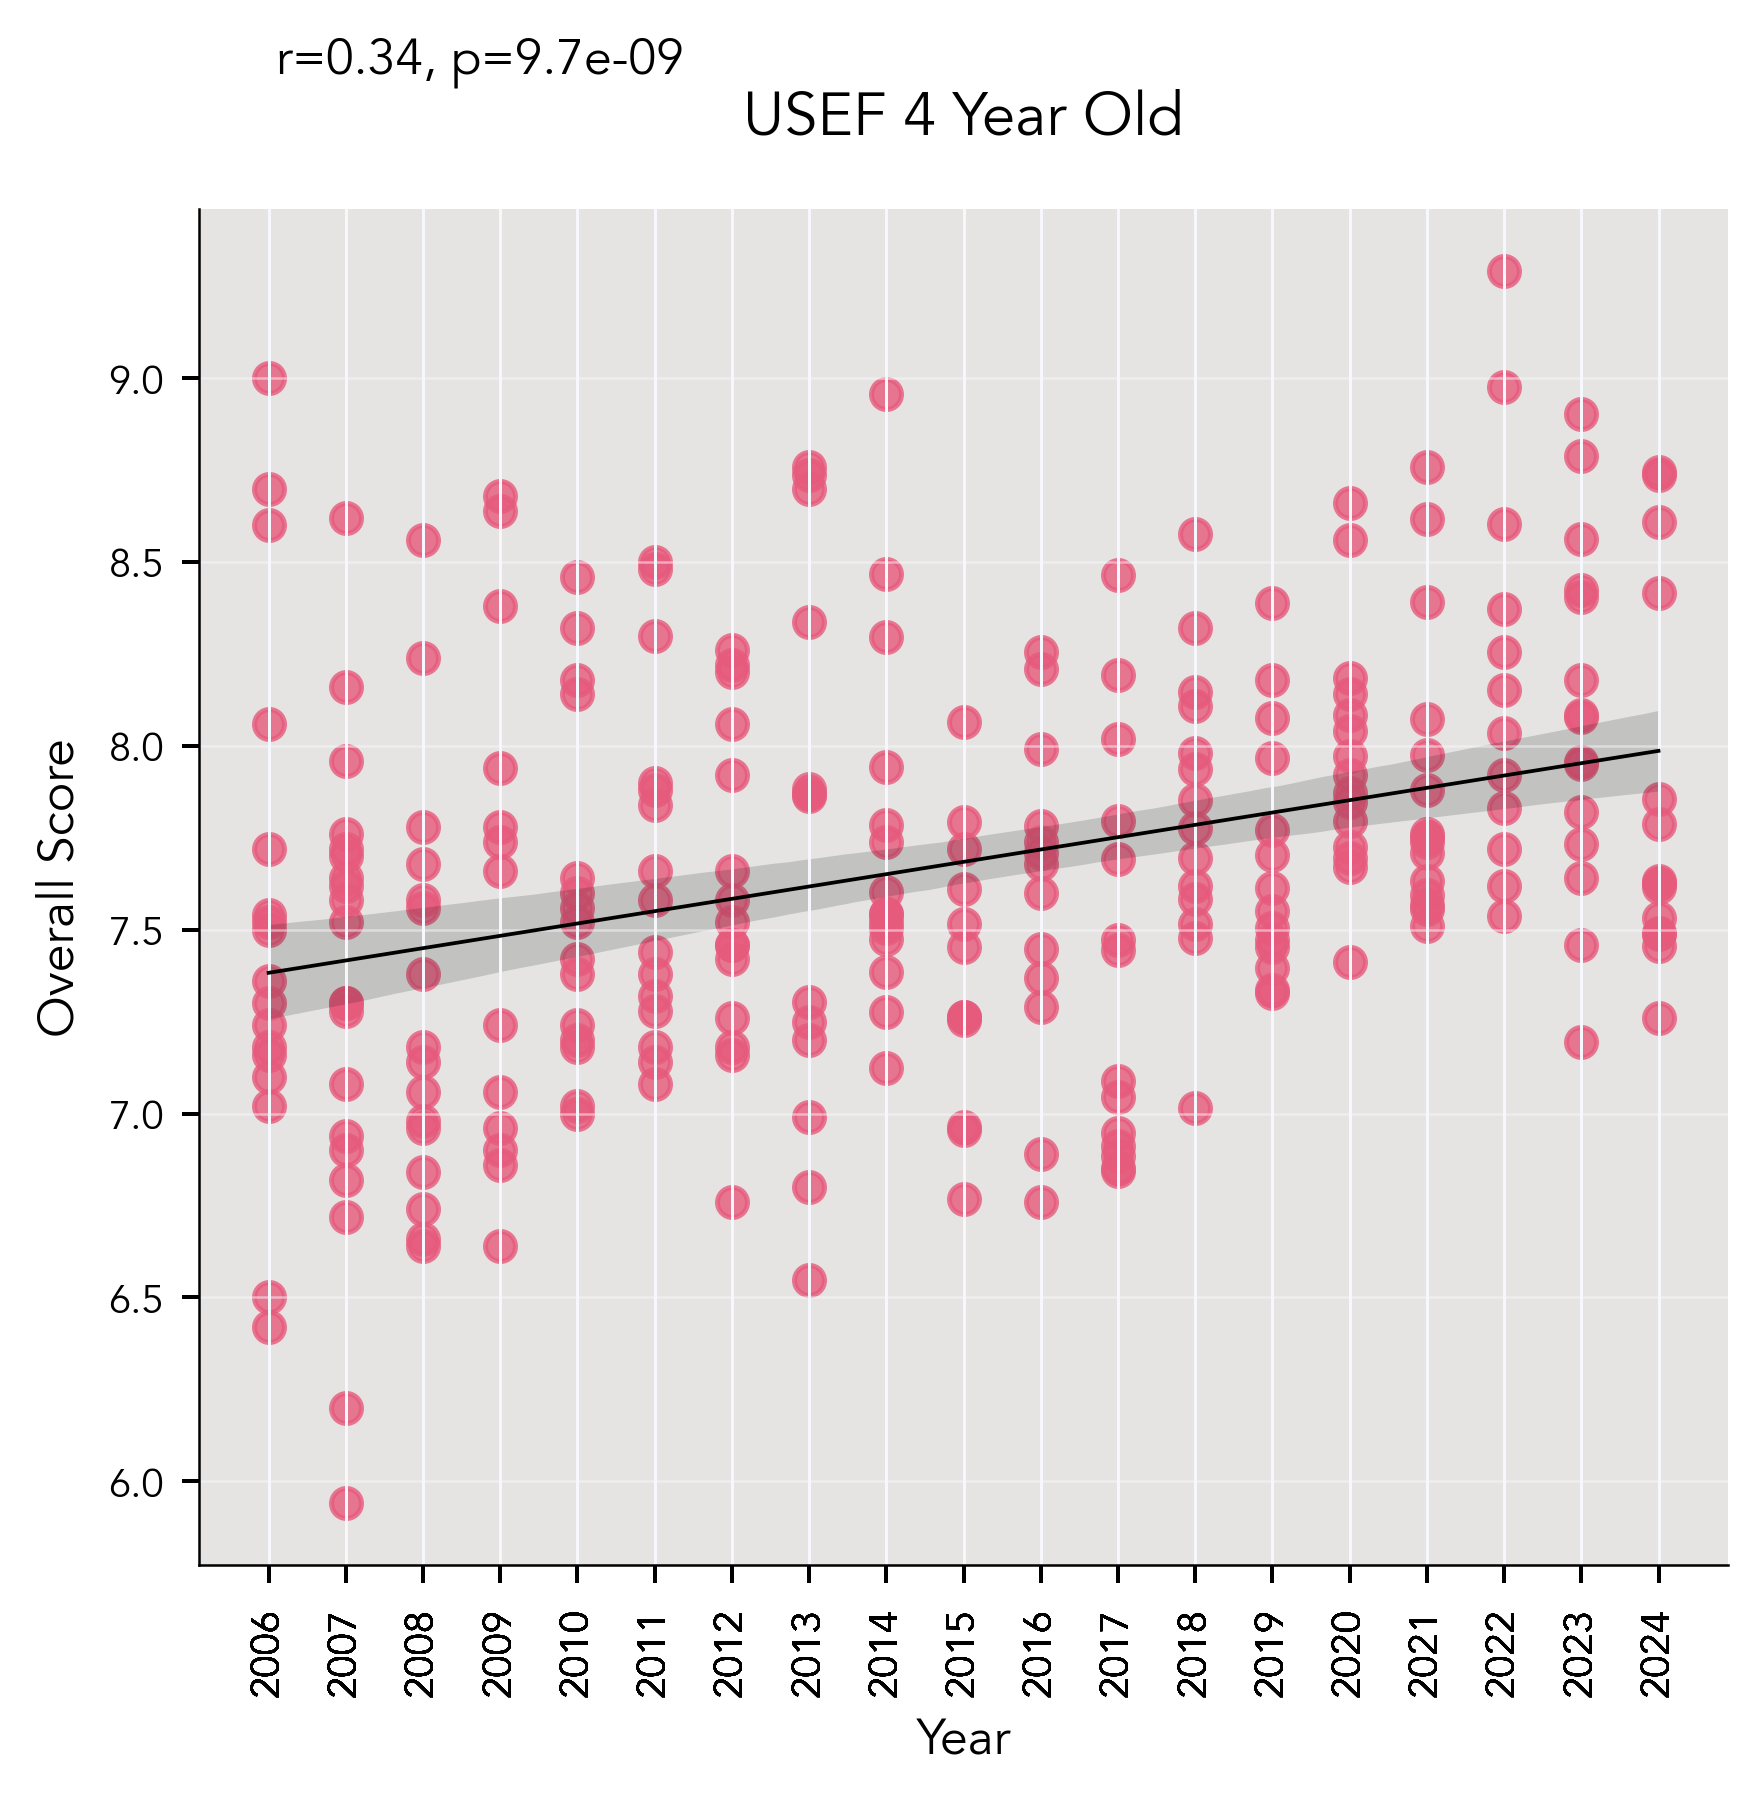

In [7]:
# create linear regression of USEF Four Year Old division scores
four = sns.lmplot(data=four_year_old_scores, x='Year', y='OverallScore', col='Division',line_kws={'color': 'k'}, scatter_kws={'color': '#e75a7c'}).set(title='USEF 4 Year Old')

# add pearsonr annotation
def annotate(data, **kws):
    r, p = st.pearsonr(data['Year'], data['OverallScore'])
    four = plt.gca()
    four.text(.05, 1.1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=four.transAxes)
    
four.map_dataframe(annotate)

# set xticks for better display
plt.xticks(four_year_old_scores['Year'], rotation=90)
plt.ylabel('Overall Score')

# save and show figure
plt.savefig('images/usef4-scatter.png')
plt.show()

### FEI 5 Year Old Analysis

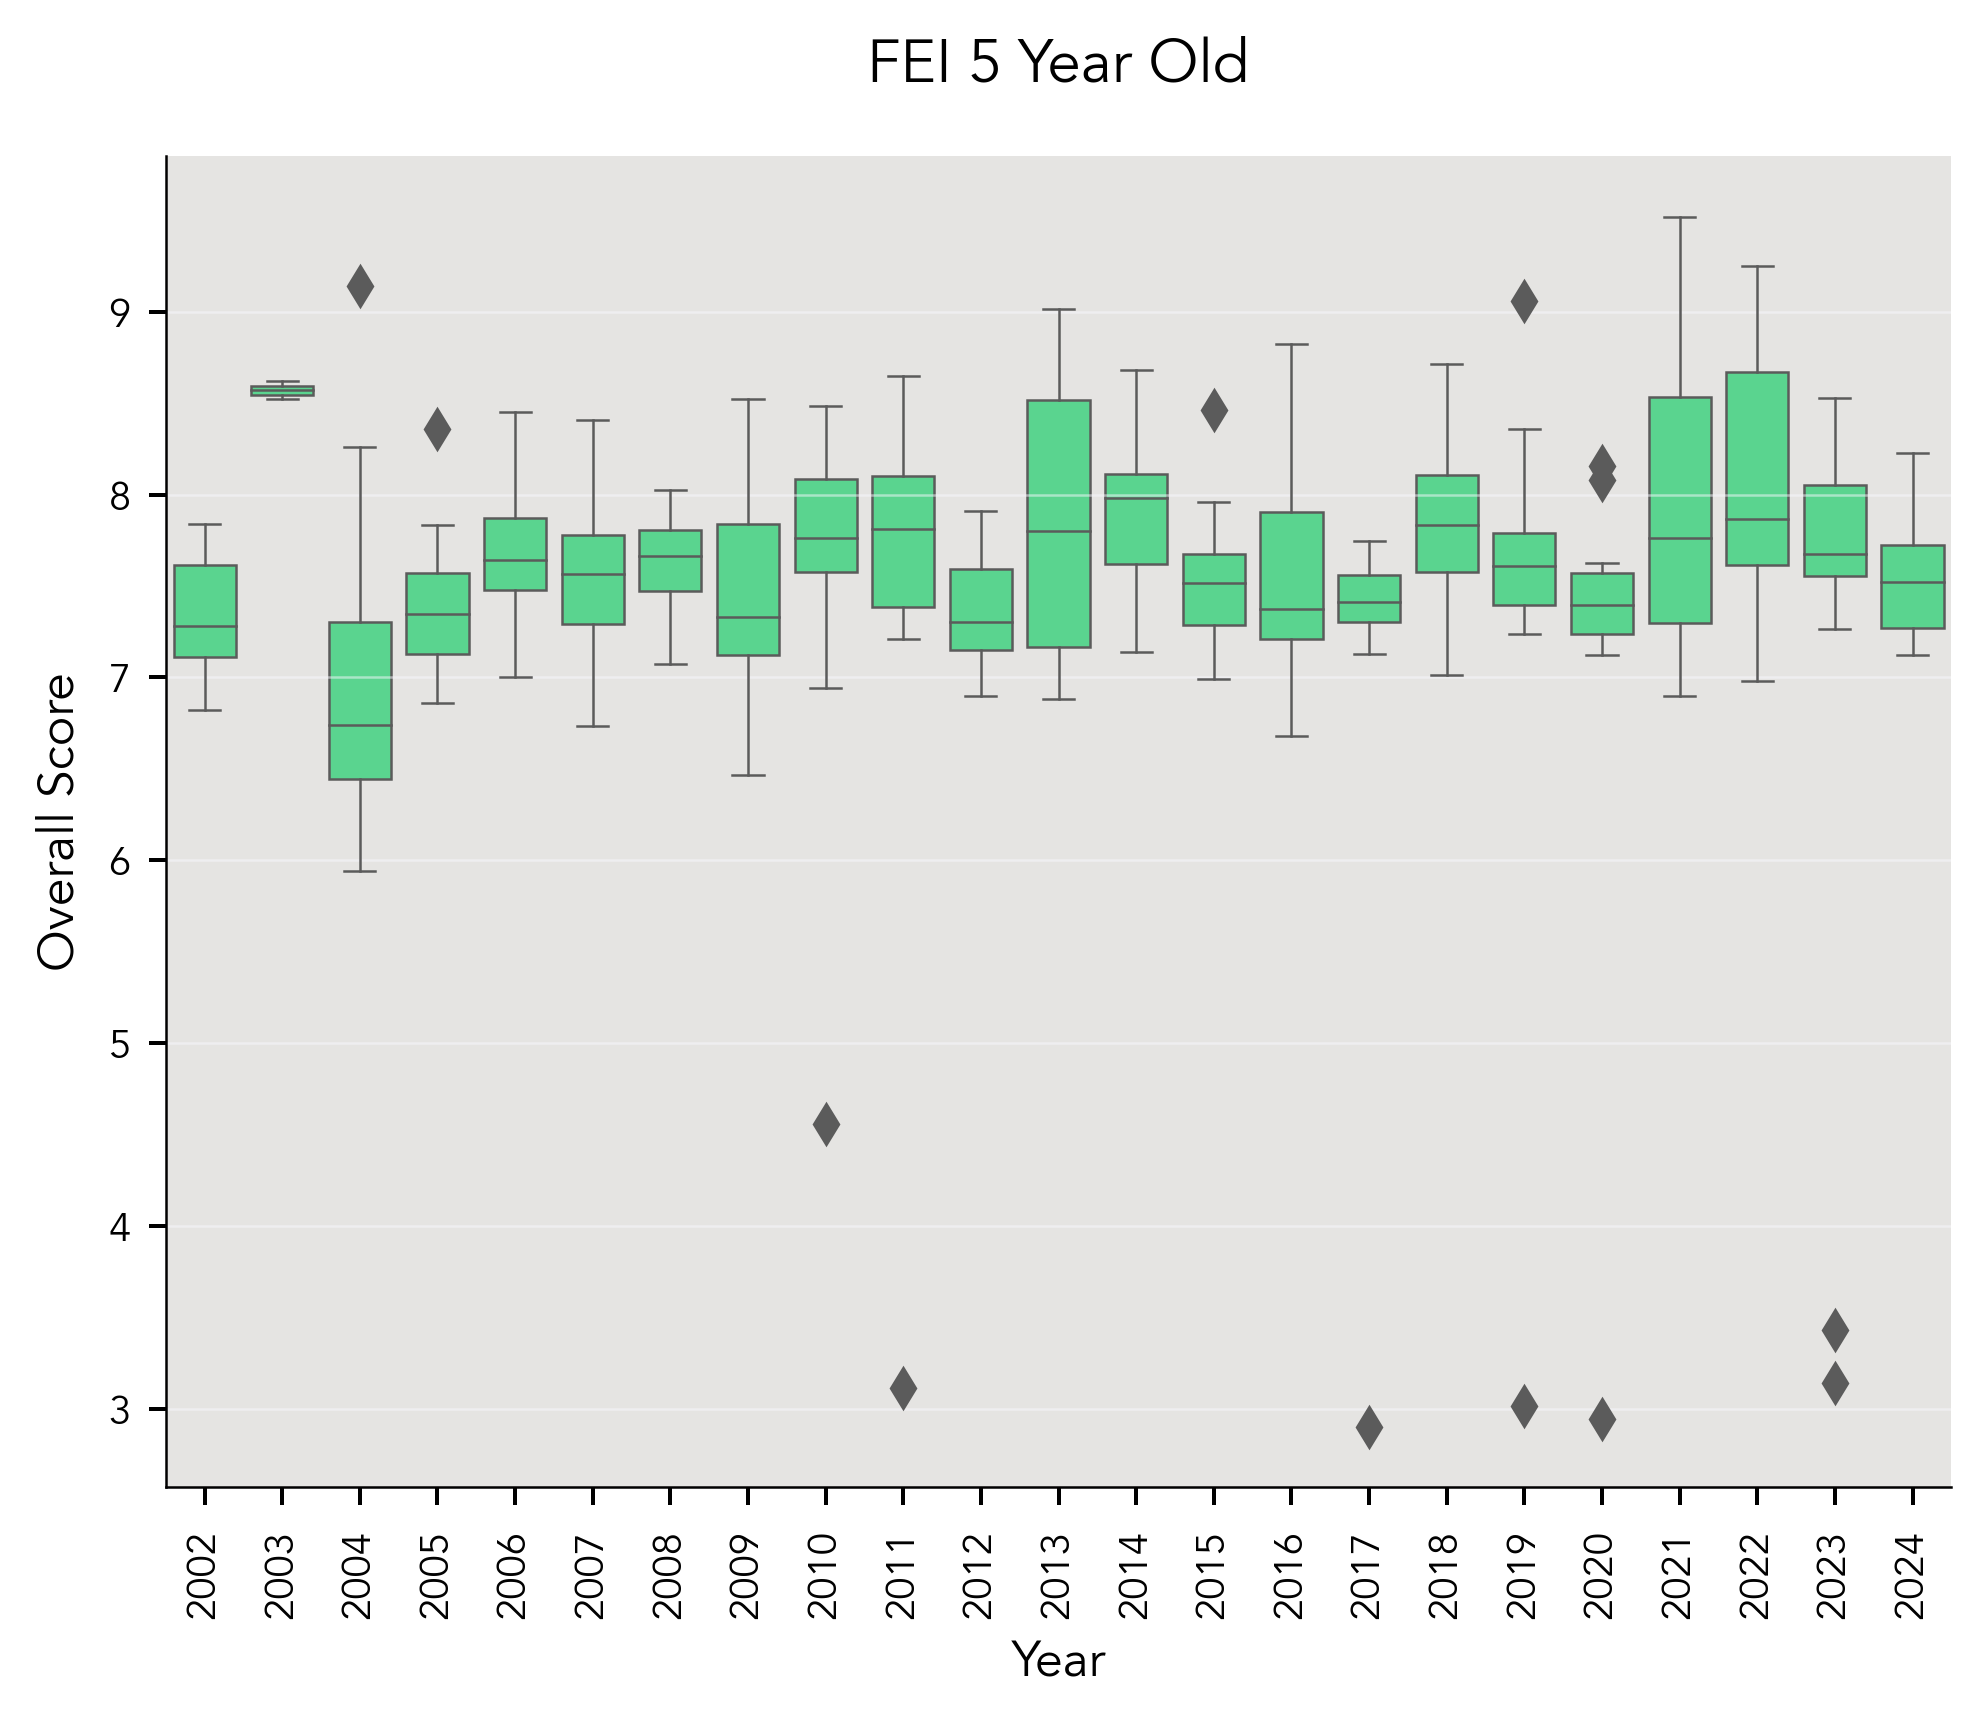

8.92 6.232000000000001
|      |   Year | Division   | Horse                |   OverallPlacing |   USDFNumber |   OverallScore |
|-----:|-------:|:-----------|:---------------------|-----------------:|-------------:|---------------:|
|   14 |   2004 | FEI5       | Royal Prince         |                1 |      1016896 |          9.14  |
|   30 |   2004 | FEI5       | Finnegan             |               17 |        37180 |          6.22  |
|   31 |   2004 | FEI5       | Cacique              |               18 |      1007175 |          5.94  |
|  328 |   2010 | FEI5       | Desaronno            |               14 |      1078702 |          4.56  |
|  373 |   2011 | FEI5       | Folkestone OLD       |               15 |      1089283 |          3.112 |
|  500 |   2013 | FEI5       | Fashion Designer OLD |                1 |      1101394 |          9.012 |
|  770 |   2017 | FEI5       | Elfenspiel           |               14 |      1121076 |          2.904 |
|  901 |   2019 | FEI5       | S

In [8]:
# select FEI 5 Year Old scores
five_year_old_scores = championship_df.loc[(championship_df['Division'].str.contains('FEI5'))]

# calculate IQR for column OverallScore
Q1 = five_year_old_scores['OverallScore'].quantile(0.25)
Q3 = five_year_old_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
ax = sns.boxplot(data=five_year_old_scores, x='Year', y='OverallScore', color='#45e98c')

# set title and ylabel
plt.title('FEI 5 Year Old')
plt.ylabel('Overall Score')

# rotate xticks
plt.xticks(rotation=90)

# save and show figure
plt.savefig('images/fei5-boxplot.png')
plt.show()

# identify outliers
threshold = 1.5
lower = (Q1 - threshold * IQR)
upper = (Q3 + threshold * IQR)
print(upper, lower)

outliers = five_year_old_scores[(five_year_old_scores['OverallScore'] < Q1 - threshold * IQR) | (five_year_old_scores['OverallScore'] > Q3 + threshold * IQR)]
print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
five_year_old_scores = five_year_old_scores.drop(five_year_old_scores[five_year_old_scores['OverallScore'] <= 5.7].index)

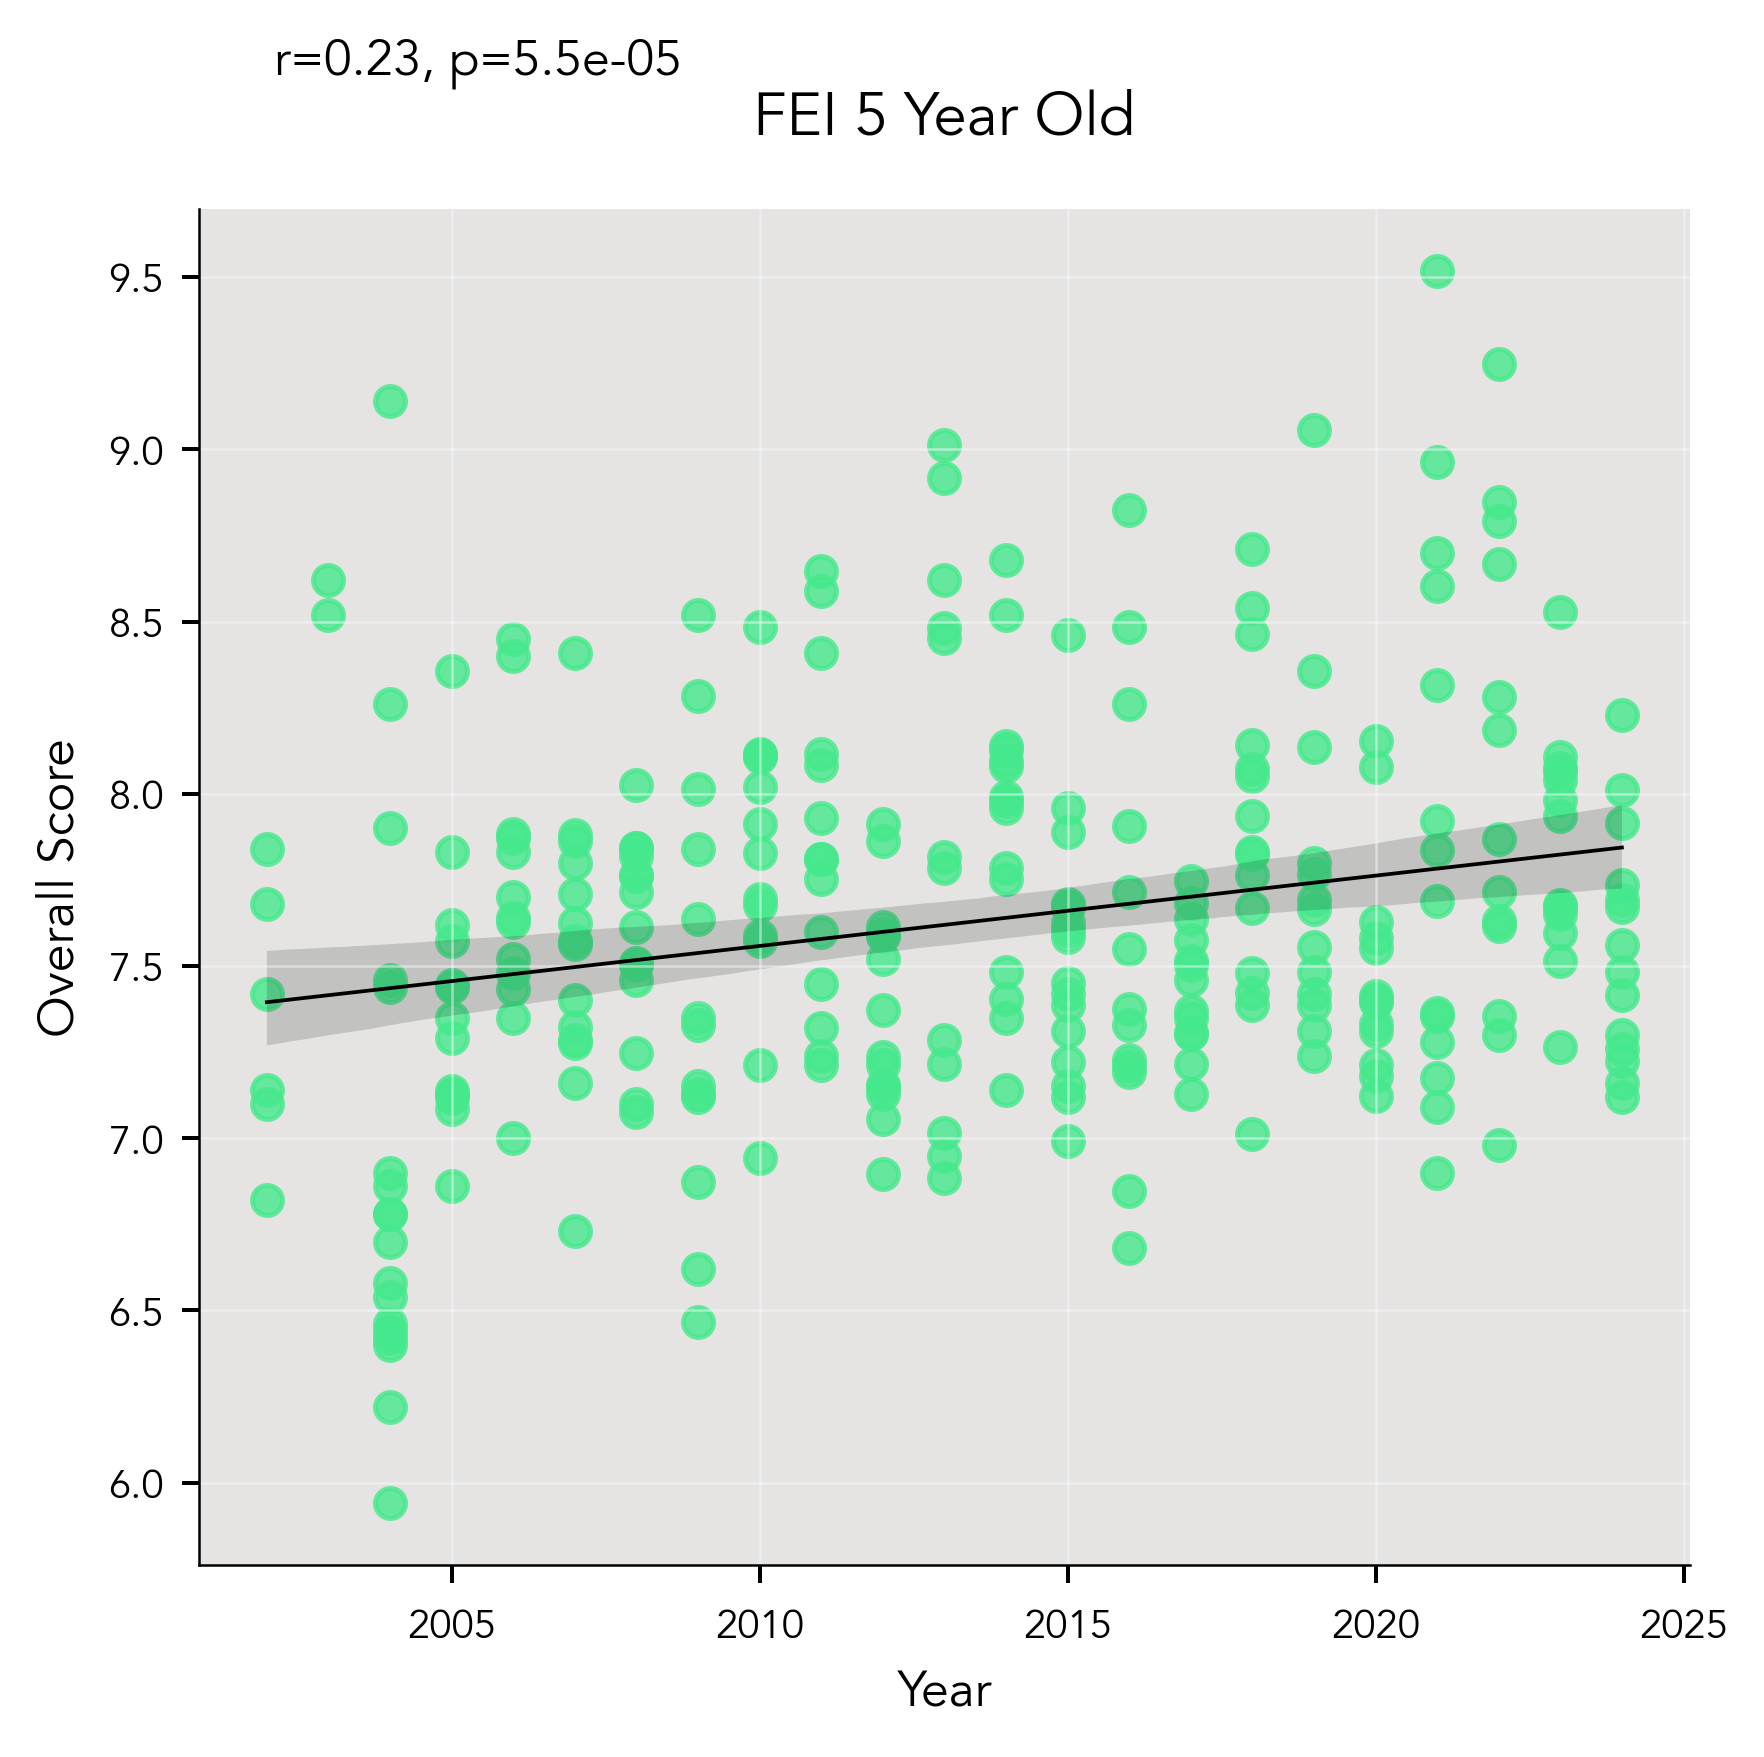

In [9]:
# create linear regression of FEI 5 Year Old division scores
five = sns.lmplot(data=five_year_old_scores, x="Year", y="OverallScore", col="Division", line_kws={'color': 'k'}, scatter_kws={'color': '#45e98c'}).set(title='FEI 5 Year Old')

# add pearsonr annotation
def annotate(data, **kws):
    r, p = st.pearsonr(data['Year'], data['OverallScore'])
    five = plt.gca()
    five.text(.05, 1.1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=five.transAxes)
    
five.map_dataframe(annotate)

# set ylabel
plt.ylabel('Overall Score')

# save and show figure
plt.savefig('images/fei5-scatter.png')
plt.show()

### FEI 6 Year Old Analysis

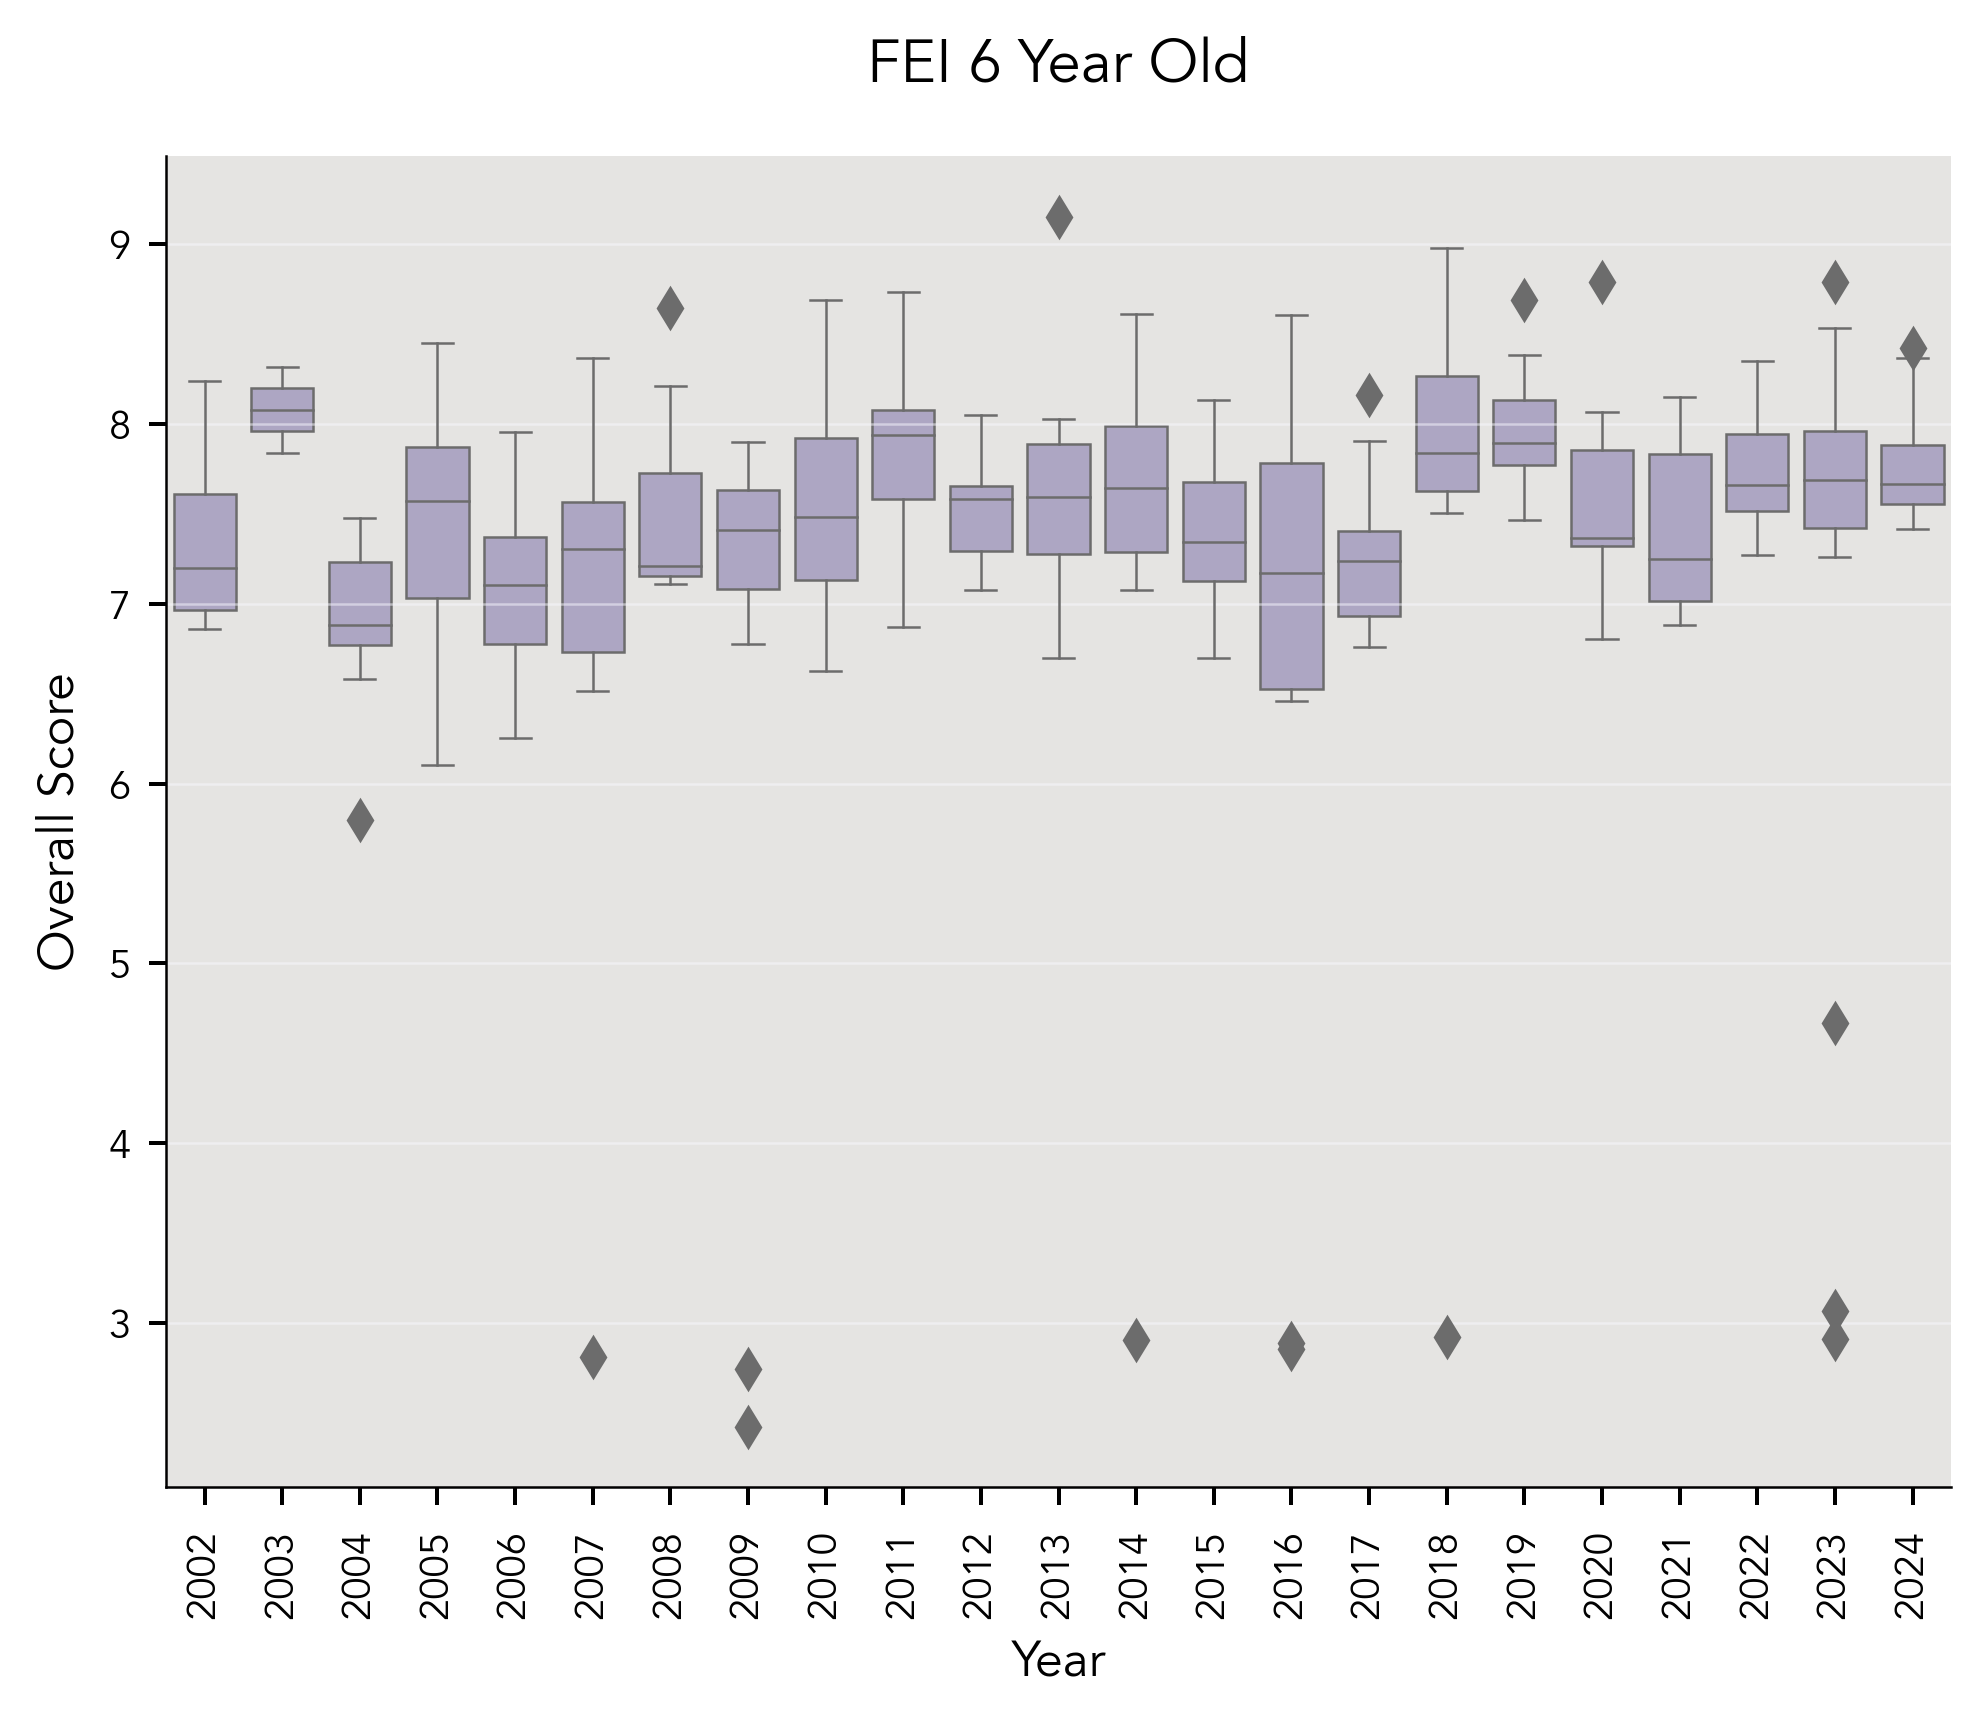

6.035749999999999 9.001750000000001
|      |   Year | Division   | Horse            |   OverallPlacing |   USDFNumber |   OverallScore |
|-----:|-------:|:-----------|:-----------------|-----------------:|-------------:|---------------:|
|   46 |   2004 | FEI6       | Caletino         |               15 |        47196 |          5.8   |
|  156 |   2007 | FEI6       | UB 40            |               14 |      1042261 |          2.808 |
|  261 |   2009 | FEI6       | Bijoux           |               12 |      1072366 |          2.744 |
|  262 |   2009 | FEI6       | Reliance         |               13 |      1061628 |          2.424 |
|  488 |   2013 | FEI6       | Vitalis          |                1 |      1101036 |          9.152 |
|  561 |   2014 | FEI6       | Dancing Hit      |               14 |      1101614 |          2.904 |
|  689 |   2016 | FEI6       | Silberpfeil      |               12 |      1106756 |          2.888 |
|  690 |   2016 | FEI6       | Fling            |      

In [10]:
# select FEI 6 Year Old scores
six_year_old_scores = championship_df.loc[(championship_df['Division'].str.contains('FEI6'))]

# calculate IQR for column OverallScore
Q1 = six_year_old_scores['OverallScore'].quantile(0.25)
Q3 = six_year_old_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
ax = sns.boxplot(data=six_year_old_scores, x='Year', y='OverallScore', color='#aaa1c8')


# set title and ylabel
plt.title('FEI 6 Year Old')
plt.ylabel('Overall Score')

# set xticks
plt.xticks(rotation=90)

# save and show figure
plt.savefig('images/fei6-boxplot.png')
plt.show()

# identify outliers
threshold = 1.5
lower = (Q1 - threshold * IQR)
upper = (Q3 + threshold * IQR)
print(lower, upper)
outliers = six_year_old_scores[(six_year_old_scores['OverallScore'] < Q1 - threshold * IQR) | (six_year_old_scores['OverallScore'] > Q3 + threshold * IQR)]
print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
six_year_old_scores = six_year_old_scores.drop(six_year_old_scores[six_year_old_scores['OverallScore'] <= 5.7].index)

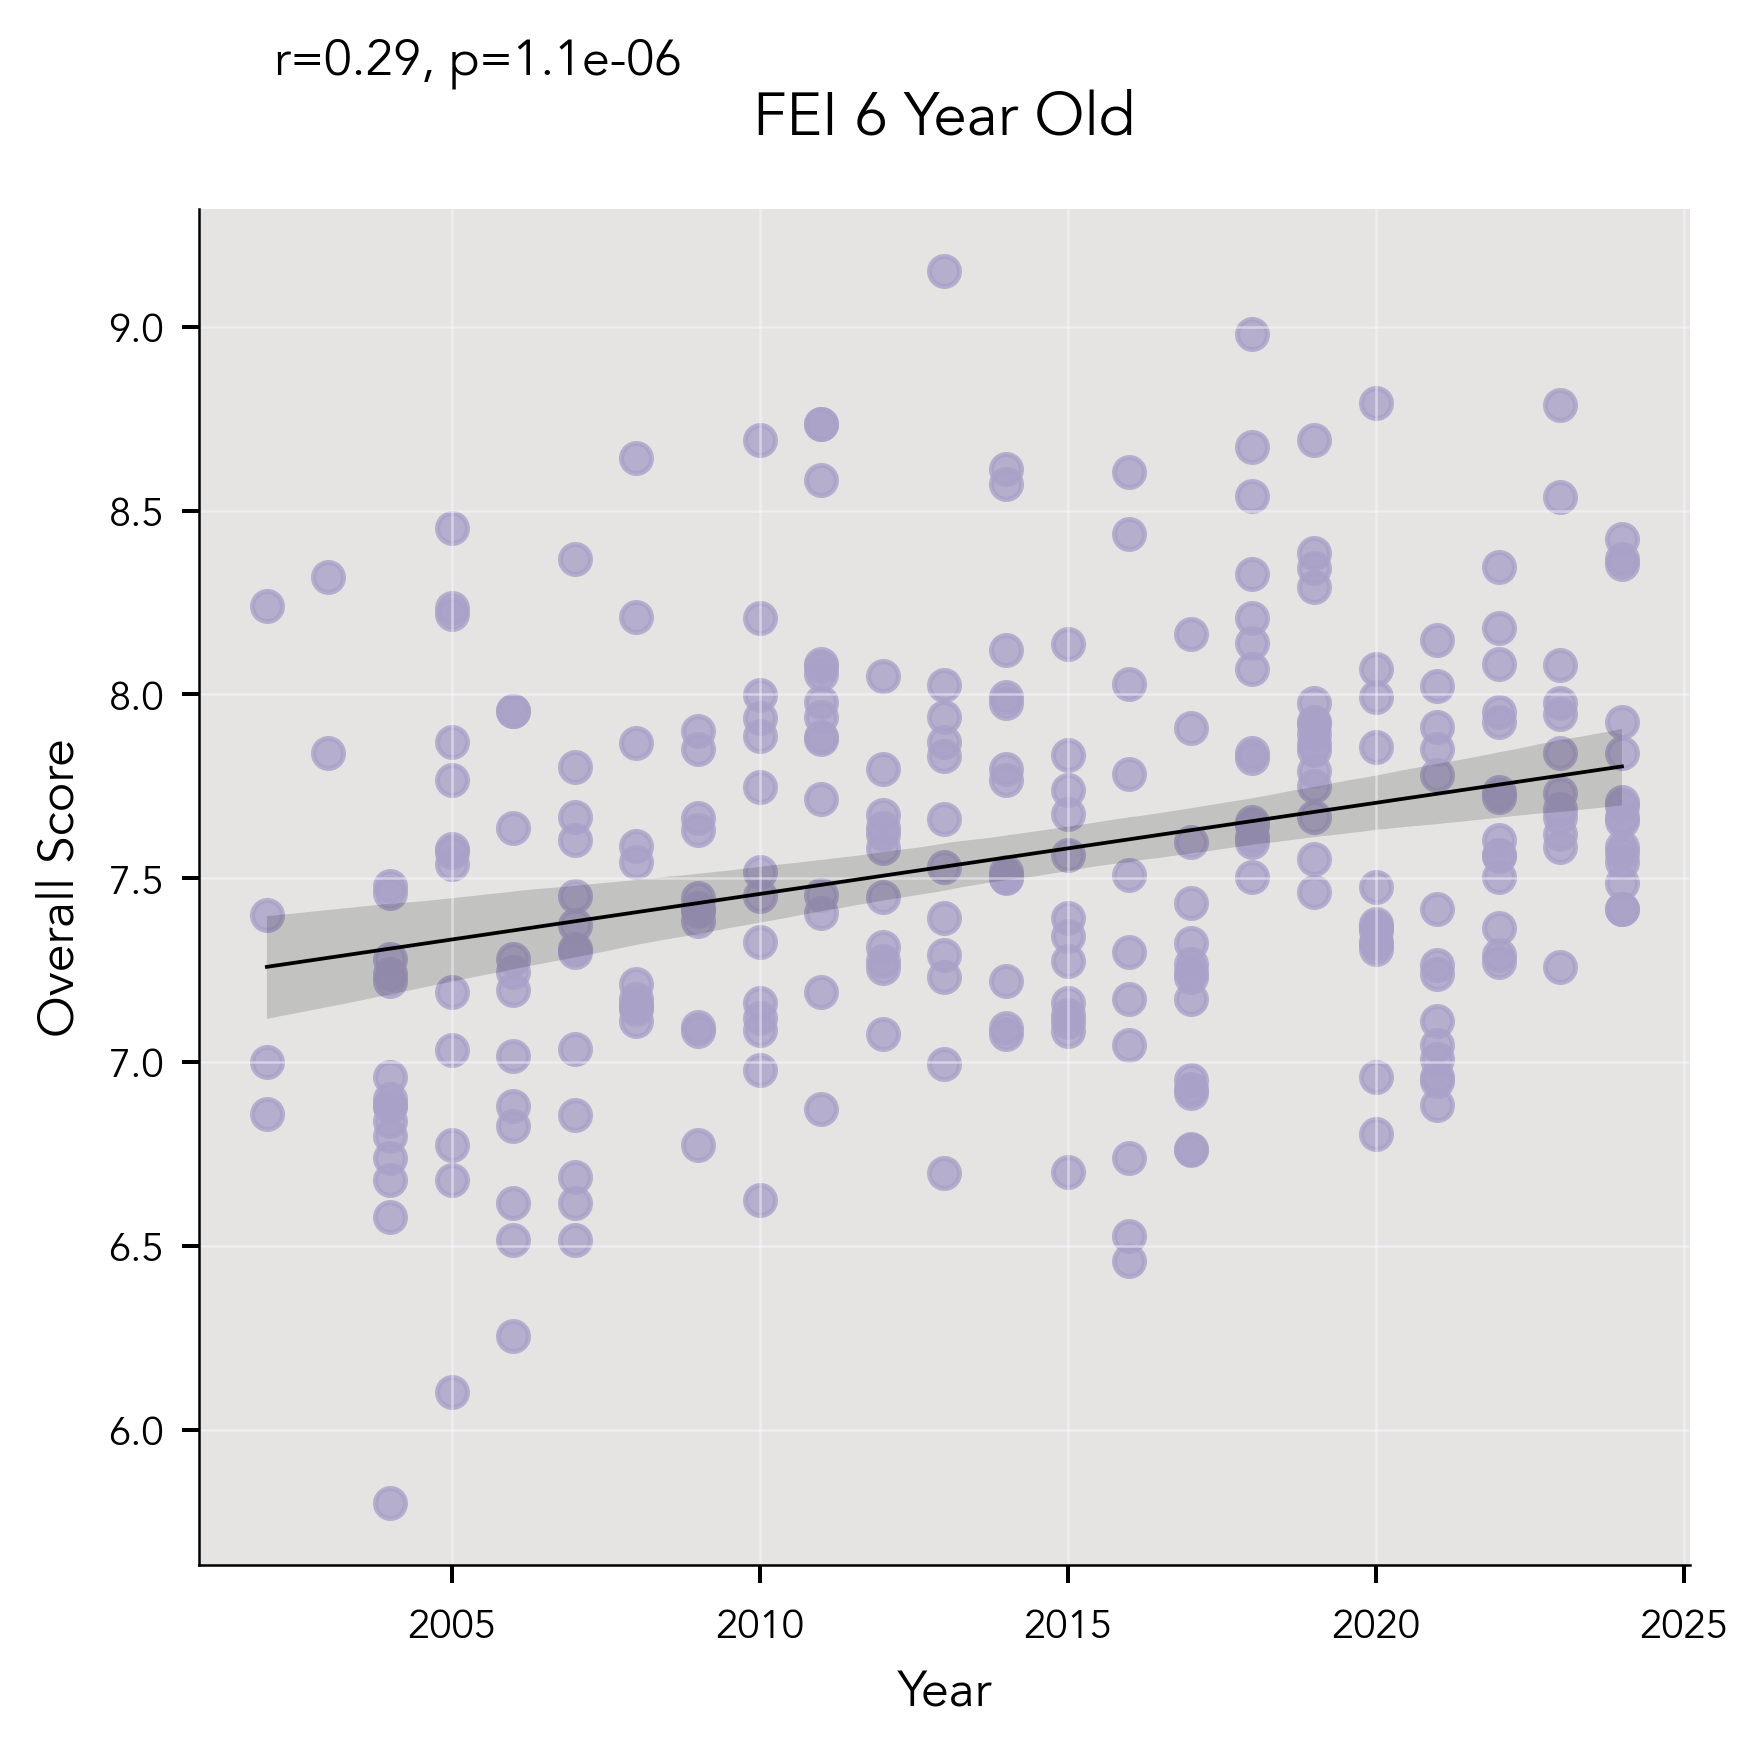

In [11]:
# create linear regression of FEI 6 Year Old division scores
six = sns.lmplot(data=six_year_old_scores, x='Year', y='OverallScore', col='Division', line_kws={'color': 'k'}, scatter_kws={'color': '#aaa1c8'}).set(title='FEI 6 Year Old')

# add pearsonr annotation
def annotate(data, **kws):
    r, p = st.pearsonr(data['Year'], data['OverallScore'])
    six = plt.gca()
    six.text(.05, 1.1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=six.transAxes)
    
six.map_dataframe(annotate)

# set ylabel
plt.ylabel('Overall Score')

# save and show figure
plt.savefig('images/fei6-scatter.png')
plt.show()



### Developing Prix St. Georges Analysis

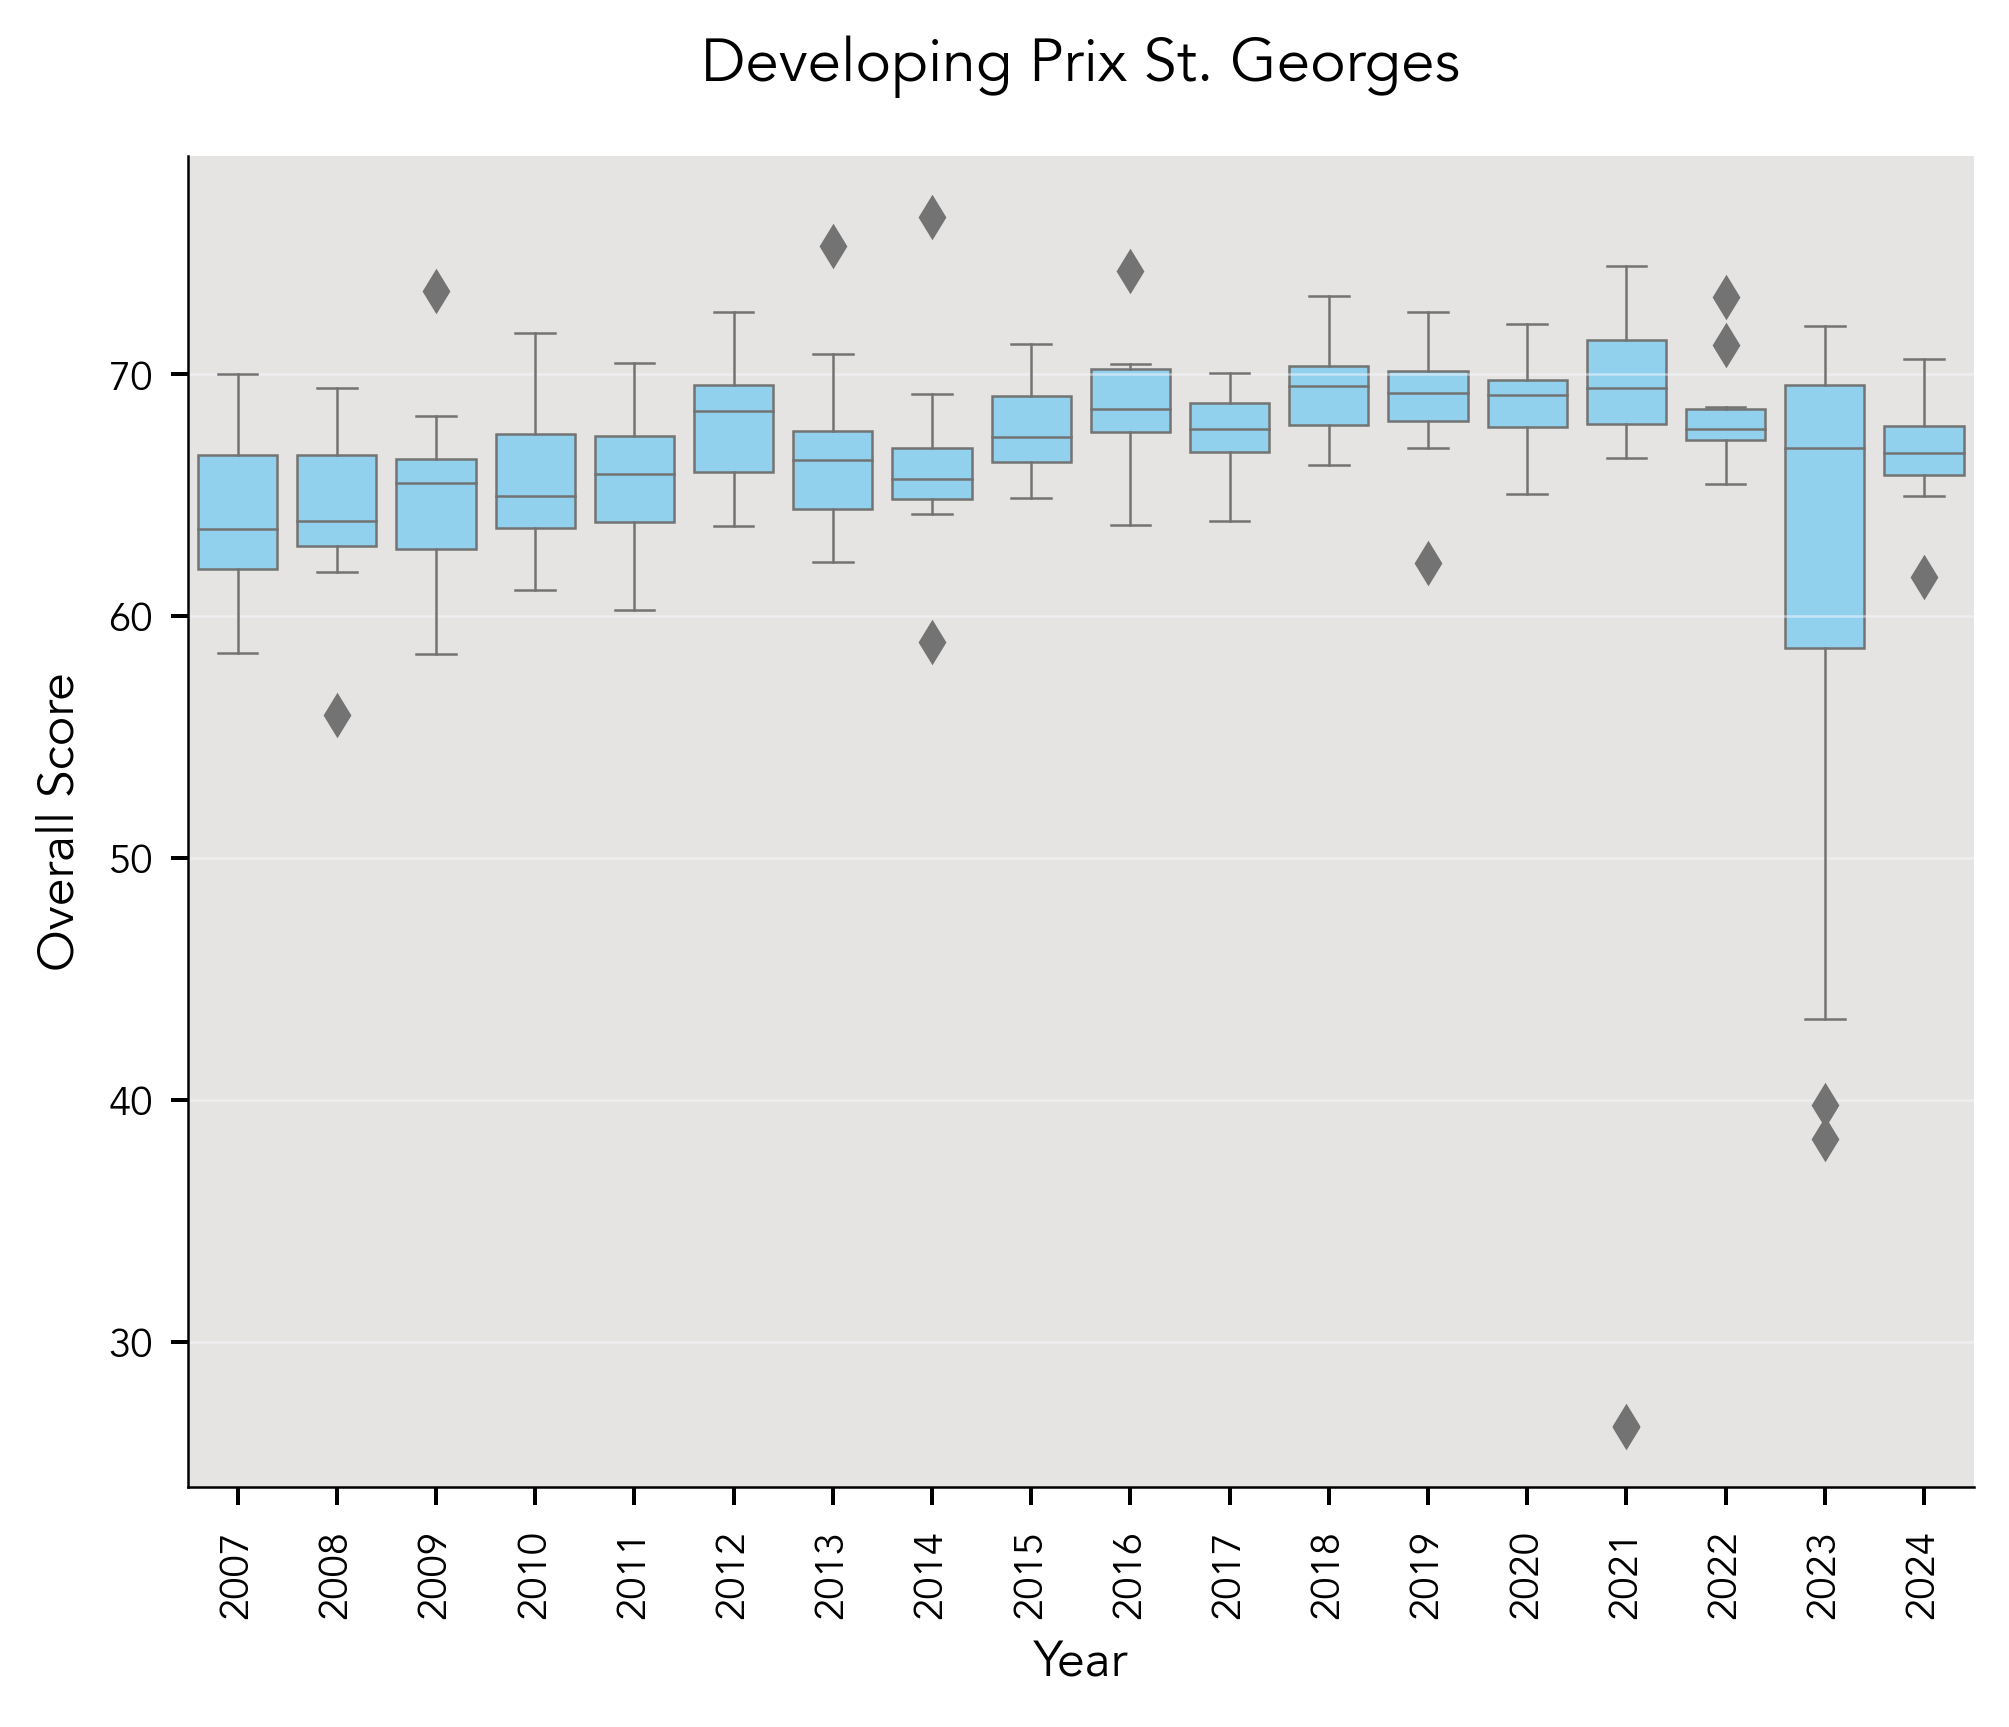

58.69775000000003 75.62774999999998
|      |   Year | Division   | Horse                   |   OverallPlacing |   USDFNumber |   OverallScore |
|-----:|-------:|:-----------|:------------------------|-----------------:|-------------:|---------------:|
|  128 |   2007 | DHPSG      | Savant                  |               14 |      1006243 |         58.5   |
|  193 |   2008 | DHPSG      | Amidala                 |               17 |      1031631 |         55.913 |
|  249 |   2009 | DHPSG      | Collector's Item        |               15 |      1035043 |         58.45  |
|  533 |   2014 | DHPSG      | Sanceo                  |                1 |      1083924 |         76.515 |
| 1023 |   2021 | DHPSG      | WEC's Senor Rubinstein  |               14 |      1124842 |         26.509 |
| 1024 |   2021 | DHPSG      | Atterupgaards Belafonte |               15 |      1145410 |         26.49  |
| 1161 |   2023 | DHPSG      | Giovanni-Bell           |               10 |      1157255 |         4

In [12]:
# select scores for Developing PSG division
dhpsg_scores = championship_df.loc[(championship_df['Division'].str.contains('DHPSG'))]

# calculate IQR for column OverallScore
Q1 = dhpsg_scores['OverallScore'].quantile(0.25)
Q3 = dhpsg_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
ax = sns.boxplot(data=dhpsg_scores, x='Year', y='OverallScore', color='#83D7FC')

# set title and ylabel
plt.title('Developing Prix St. Georges')
plt.ylabel('Overall Score')

# set xticks
plt.xticks(rotation=90)

# save and show figure
plt.savefig('images/dhpsg-boxplot.png')
plt.show()

# identify outliers
threshold = 1.5
lower = (Q1 - threshold * IQR)
upper = (Q3 + threshold * IQR)
print(lower, upper)
outliers = dhpsg_scores[(dhpsg_scores['OverallScore'] < Q1 - threshold * IQR) | (dhpsg_scores['OverallScore'] > Q3 + threshold * IQR)]
print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
dhpsg_scores = dhpsg_scores.drop(dhpsg_scores[dhpsg_scores['OverallScore'] <= 54.000].index)



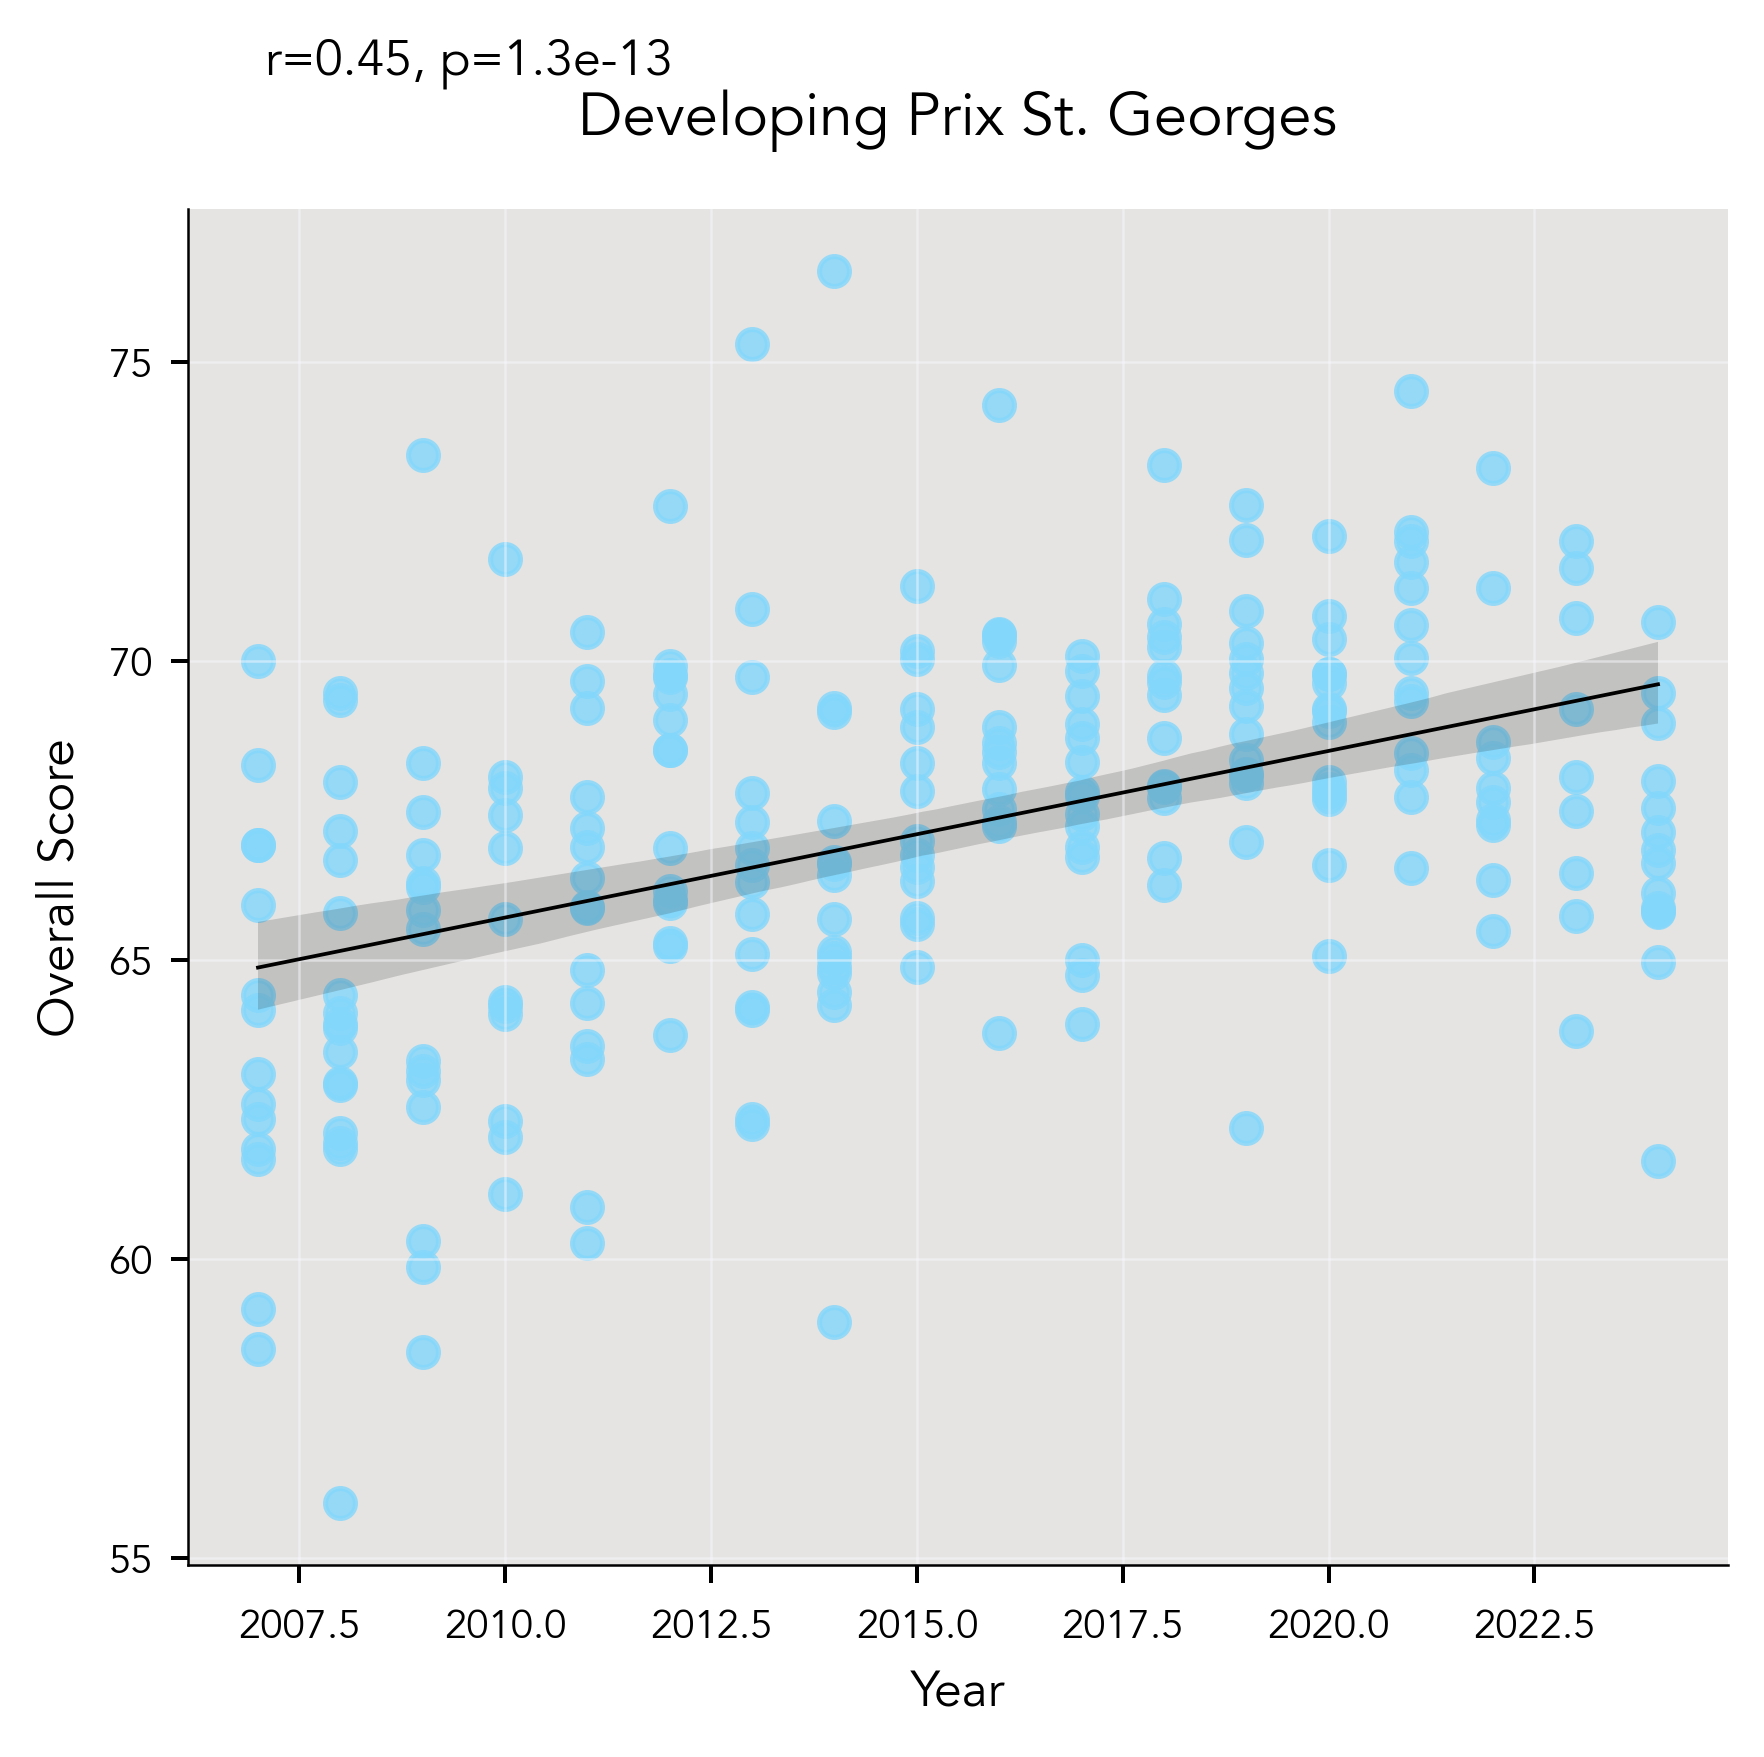

In [14]:
# create linear regression of Developing Prix St. Georges division scores
dhpsg = sns.lmplot(data=dhpsg_scores, x='Year', y='OverallScore', col='Division', line_kws={'color': 'k'}, scatter_kws={'color': '#83D7FC'}).set(title='Developing Prix St. Georges')

# add pearsonr annotation
def annotate(data, **kws):
    r, p = st.pearsonr(data['Year'], data['OverallScore'])
    dhpsg = plt.gca()
    dhpsg.text(.05, 1.1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=dhpsg.transAxes)
    
dhpsg.map_dataframe(annotate)

# set ylabel
plt.ylabel('Overall Score')

# save and show figure
plt.savefig('images/dhpsg-scatter.png')
plt.show()

### Developing Grand Prix Analysis

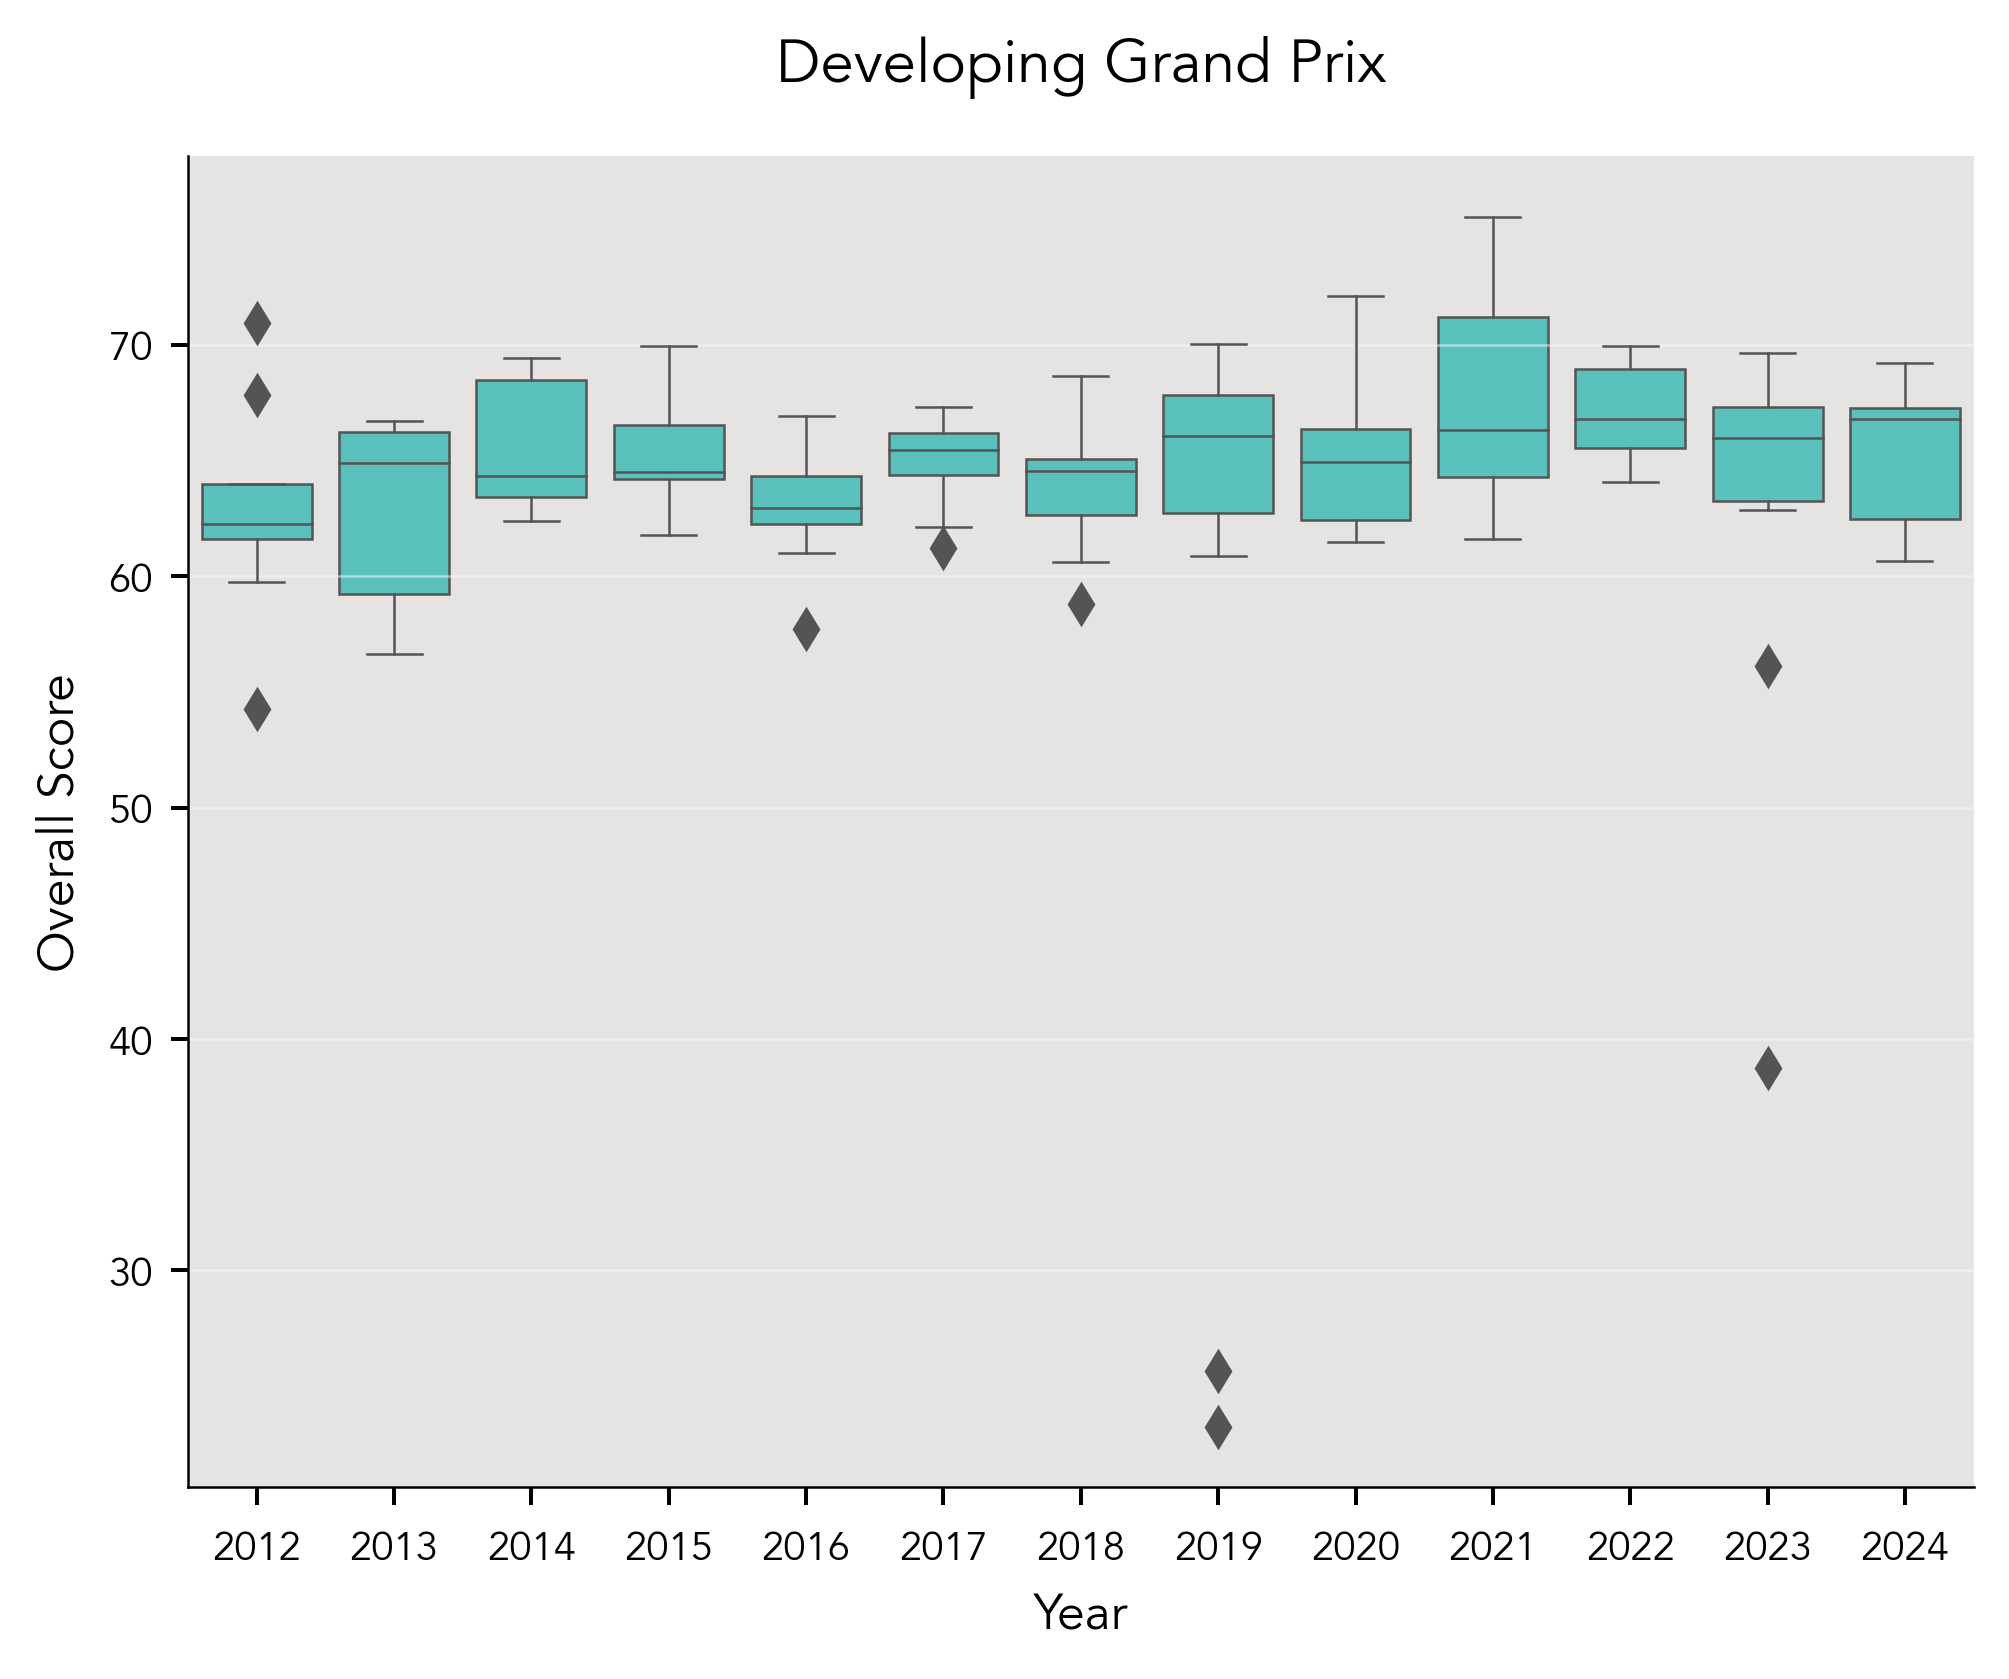

56.4435 73.23150000000001
|      |   Year | Division   | Horse                  |   OverallPlacing |   USDFNumber |   OverallScore |
|-----:|-------:|:-----------|:-----------------------|-----------------:|-------------:|---------------:|
|  412 |   2012 | DHGP       | Veva Rose              |                9 |      1091827 |         54.271 |
|  869 |   2019 | DHGP       | Faberge Blue           |               14 |      1107486 |         25.666 |
|  870 |   2019 | DHGP       | Pik L's Donabella HU   |               15 |      1099805 |         23.254 |
|  998 |   2021 | DHGP       | Serenade MF            |                1 |      1103046 |         75.519 |
| 1150 |   2023 | DHGP       | Incredible Jacky       |               10 |      1136100 |         56.128 |
| 1151 |   2023 | DHGP       | WEC's Senor Rubinstein |               11 |      1124842 |         38.75  |


In [15]:
# select scores for Developing Grand Prix division
dhgp_scores = championship_df.loc[(championship_df['Division'].str.contains('DHGP'))]


# calculate IQR for column OverallScore
Q1 = dhgp_scores['OverallScore'].quantile(0.25)
Q3 = dhgp_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
sns.boxplot(data=dhgp_scores, x='Year', y='OverallScore', color='mediumturquoise')

plt.ylabel('Overall Score')
# set title, save and show figure
plt.title('Developing Grand Prix')
plt.savefig('images/dhgp-boxplot.png')
plt.show()

# identify outliers
threshold = 1.5
lower = (Q1 - threshold * IQR)
upper = (Q3 + threshold * IQR)
print(lower, upper)
outliers = dhgp_scores[(dhgp_scores['OverallScore'] < Q1 - threshold * IQR) | (dhgp_scores['OverallScore'] > Q3 + threshold * IQR)]
print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
dhgp_scores = dhgp_scores.drop(dhgp_scores[dhgp_scores['OverallScore'] <= 54.000].index)


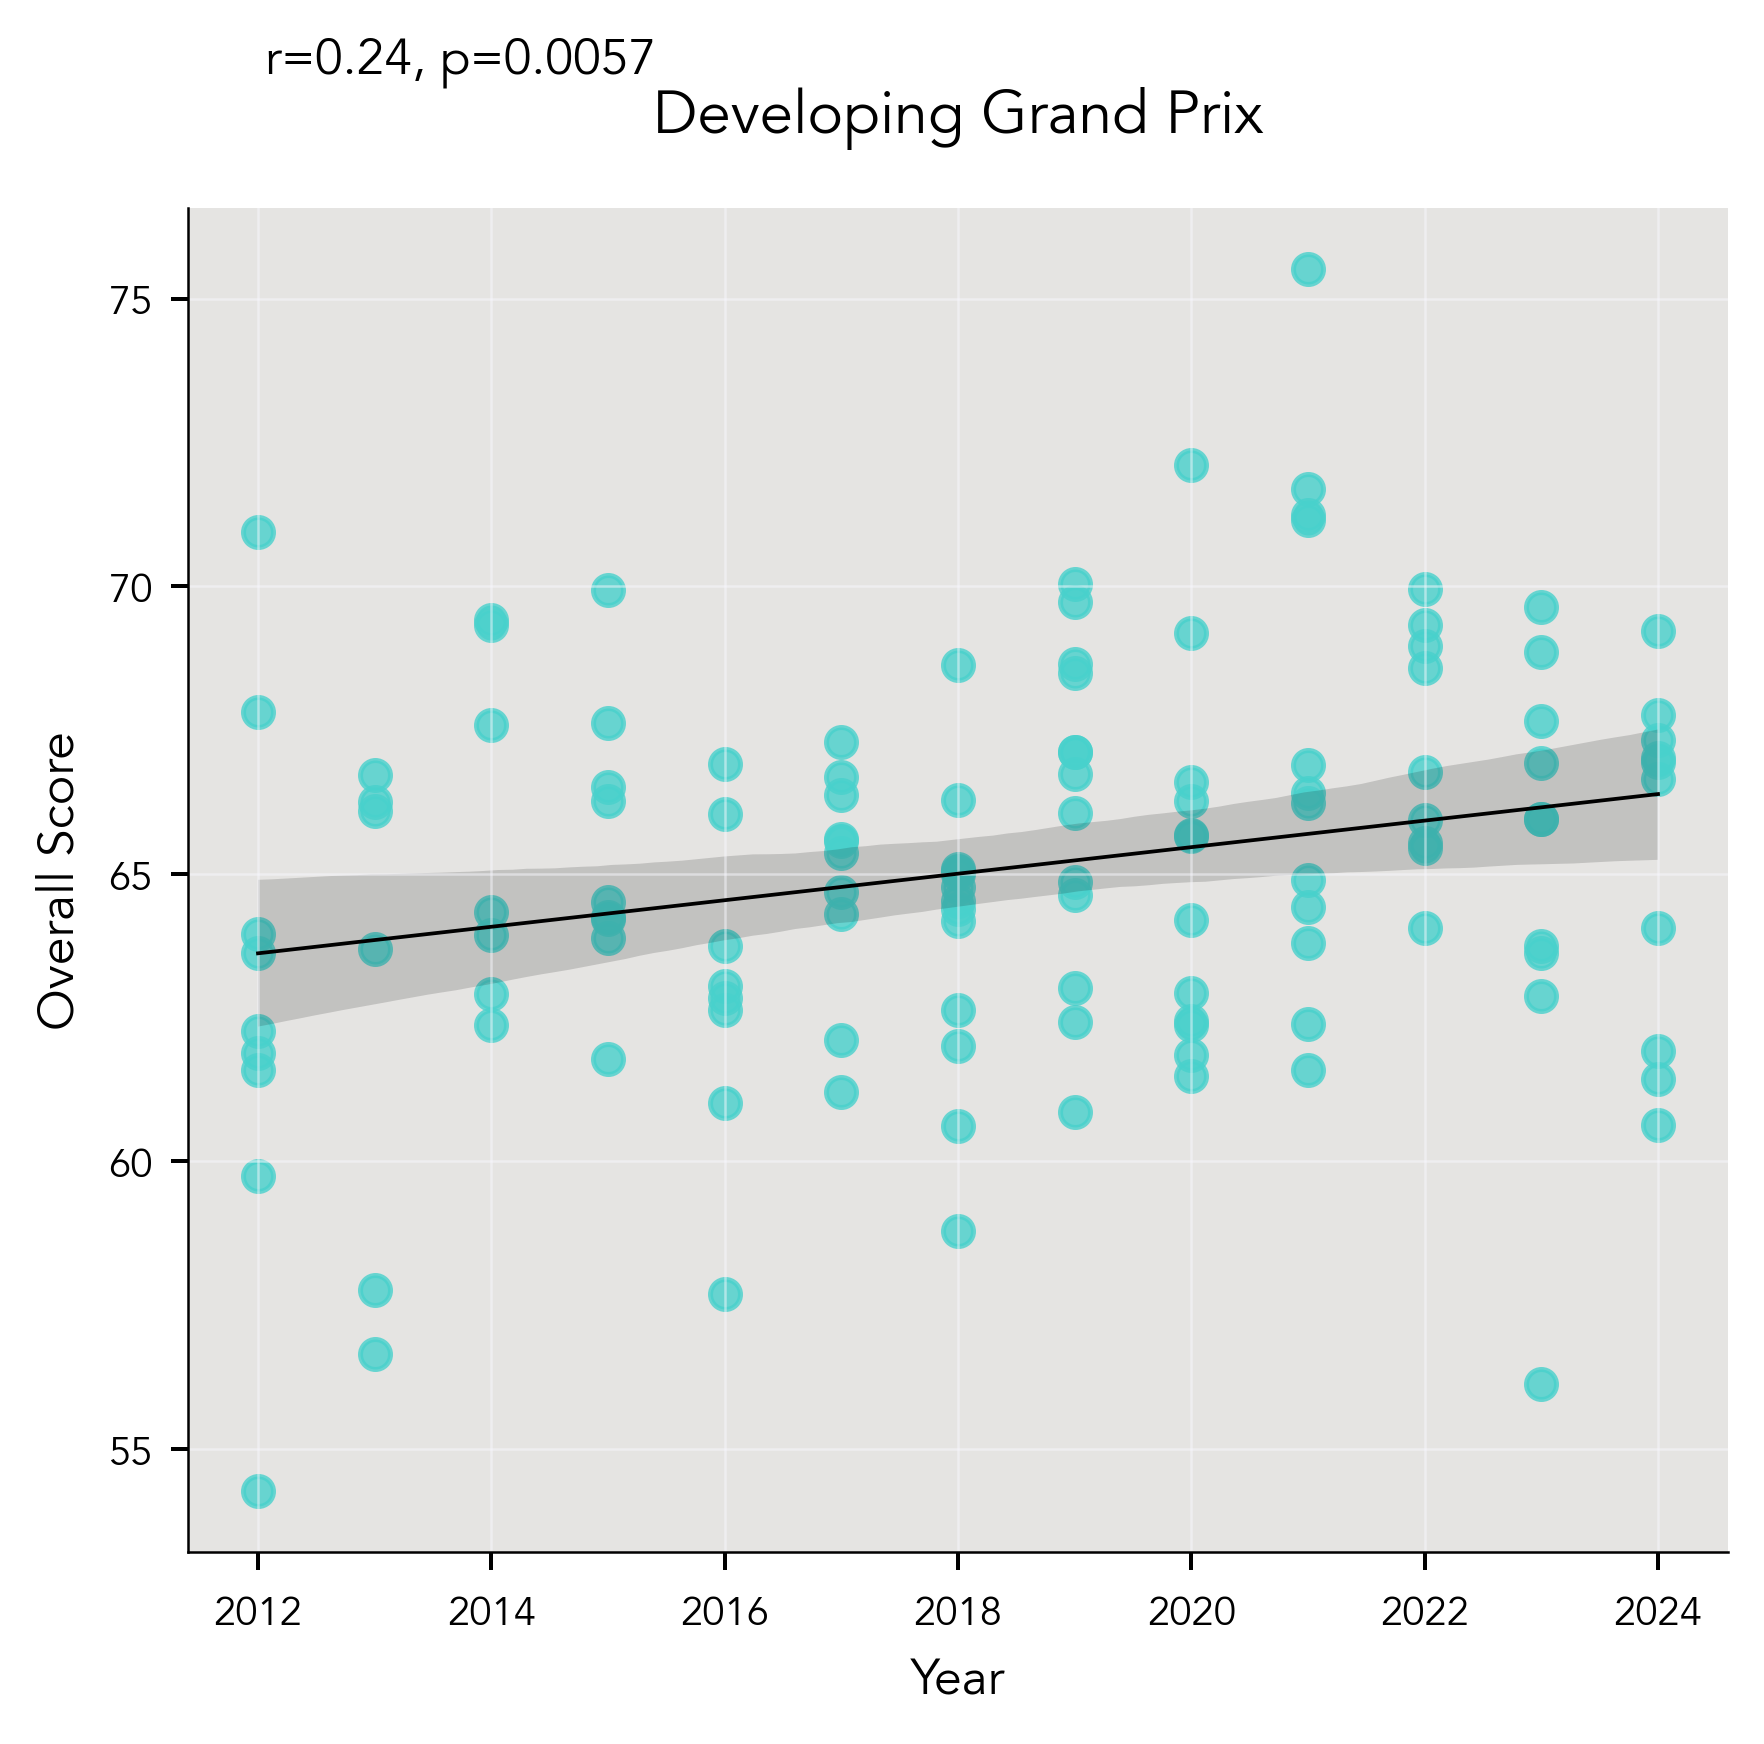

In [16]:
# create linear regression of Developing Grand Prix division scores
gp = sns.lmplot(data=dhgp_scores, x='Year', y='OverallScore', line_kws={'color': 'k'}, scatter_kws={'color': 'mediumturquoise'}).set(title='Developing Grand Prix', ylabel=('Overall Score'))

# add pearsonr annotation
def annotate(data, **kws):
    r, p = st.pearsonr(data['Year'], data['OverallScore'])
    gp = plt.gca()
    gp.text(.05, 1.1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=gp.transAxes)
    
gp.map_dataframe(annotate)

# save and show figure
plt.savefig('images/dhgp-scatter.png')
plt.show()